In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [4]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Dagshub/mlflow initialization

In [5]:
!pip install dagshub mlflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 6.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 52.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 79.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 2.7 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [6]:
import dagshub
dagshub.init(repo_owner='ekvirika', repo_name='HousePrices', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=fdc1575d-31b1-4ea9-8d5a-1c7a9be170bc&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=8c9c3fe536c9e45bb15dd524169504e5c21e994c5d87daa398ac7c3621d81661




Output()

Accessing as ekvirika

Initialized MLflow to track repo "ekvirika/HousePrices"

Repository ekvirika/HousePrices initialized!

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preprocessing

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

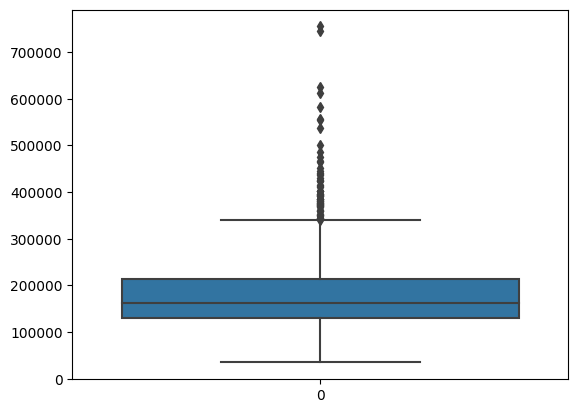

In [8]:
import seaborn as sns
sns.boxplot(df['SalePrice'])

So, there are two outliers > 700 000

<ipython-input-9-ee23fe7e19e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

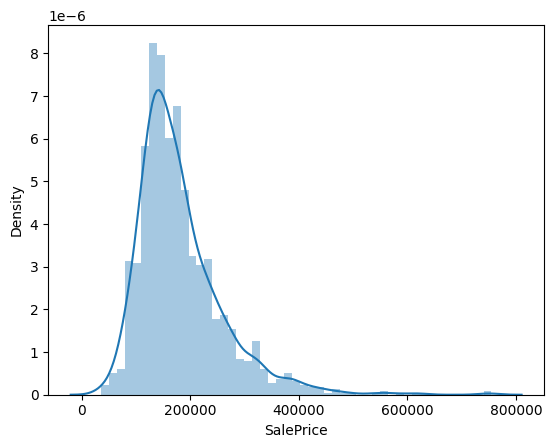

In [9]:
sns.distplot(df['SalePrice'])

## Plot N/A value columns

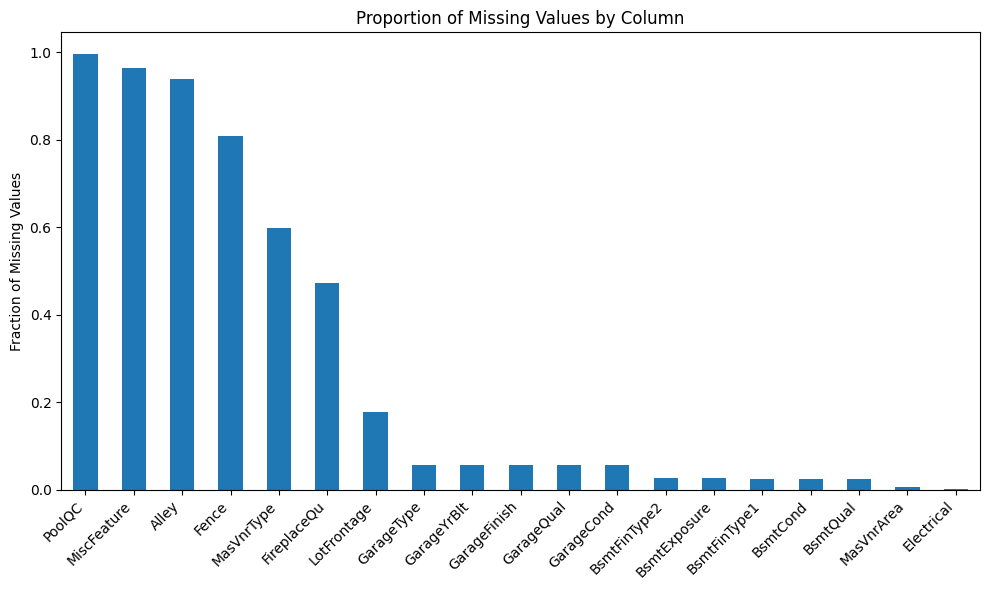

In [10]:
import matplotlib.pyplot as plt

null_ratio = df.isna().sum() / df.shape[0]
null_ratio = null_ratio[null_ratio > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
null_ratio.plot(kind='bar')
plt.title('Proportion of Missing Values by Column')
plt.ylabel('Fraction of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Lets drop columns that have majority na-s.**

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns (38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageC

## Visualize numerical features

<Figure size 1500x1000 with 0 Axes>

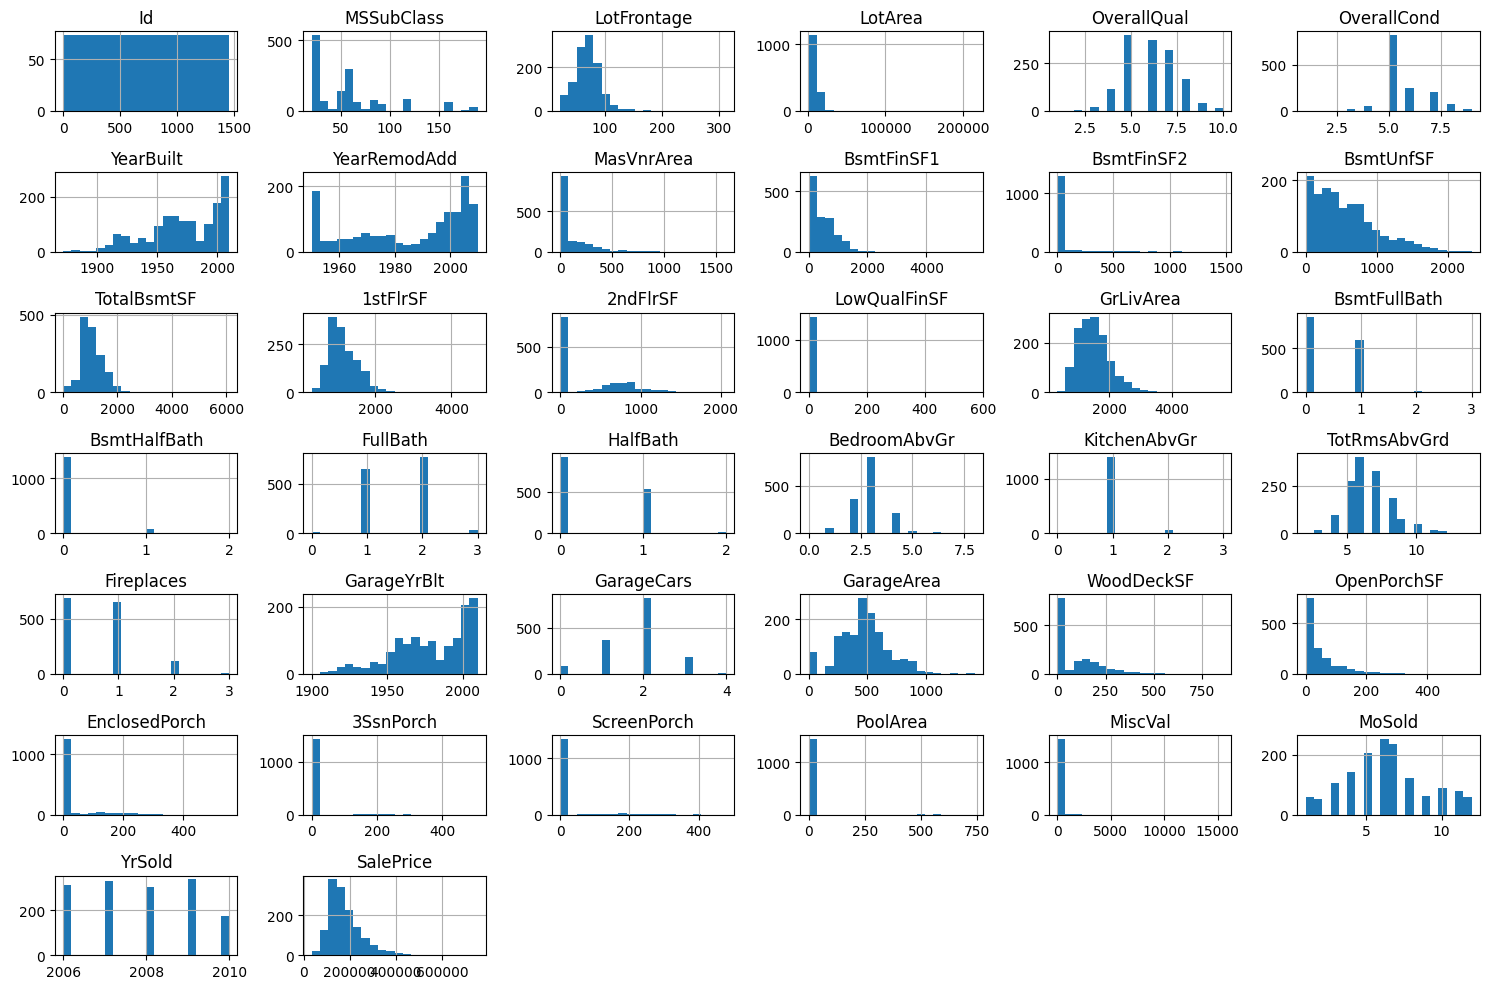

In [15]:
import matplotlib.pyplot as plt

df[num_cols].describe()

plt.figure(figsize=(15, 10))
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Visualize categorical features

Found 43 categorical features:
          Feature  Unique Values Most Common  Count Percentage
8    Neighborhood             25       NAmes    225     15.41%
16    Exterior2nd             16     VinylSd    504     34.52%
15    Exterior1st             15     VinylSd    515     35.27%
41       SaleType              9          WD   1267     86.78%
9      Condition1              9        Norm   1260     86.30%
10     Condition2              8        Norm   1445     98.97%
12     HouseStyle              8      1Story    726     49.73%
14       RoofMatl              8     CompShg   1434     98.22%
31     Functional              7         Typ   1360     93.15%
25   BsmtFinType2              6         Unf   1256     86.03%
26        Heating              6        GasA   1428     97.81%
13      RoofStyle              6       Gable   1141     78.15%
42  SaleCondition              6      Normal   1198     82.05%
24   BsmtFinType1              6         Unf    430     29.45%
33     GarageType       

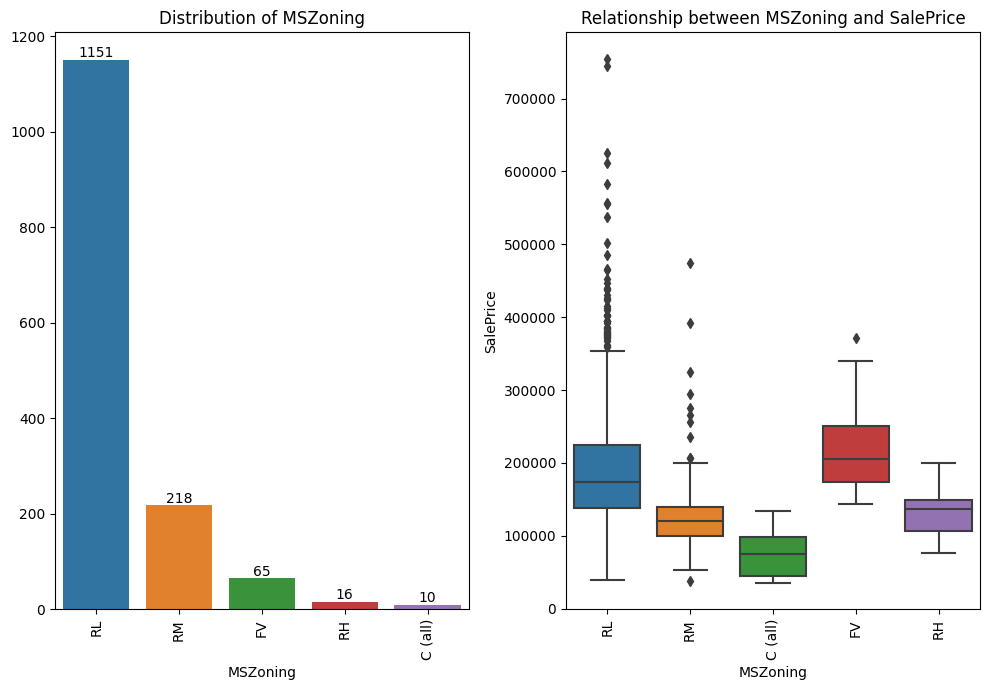

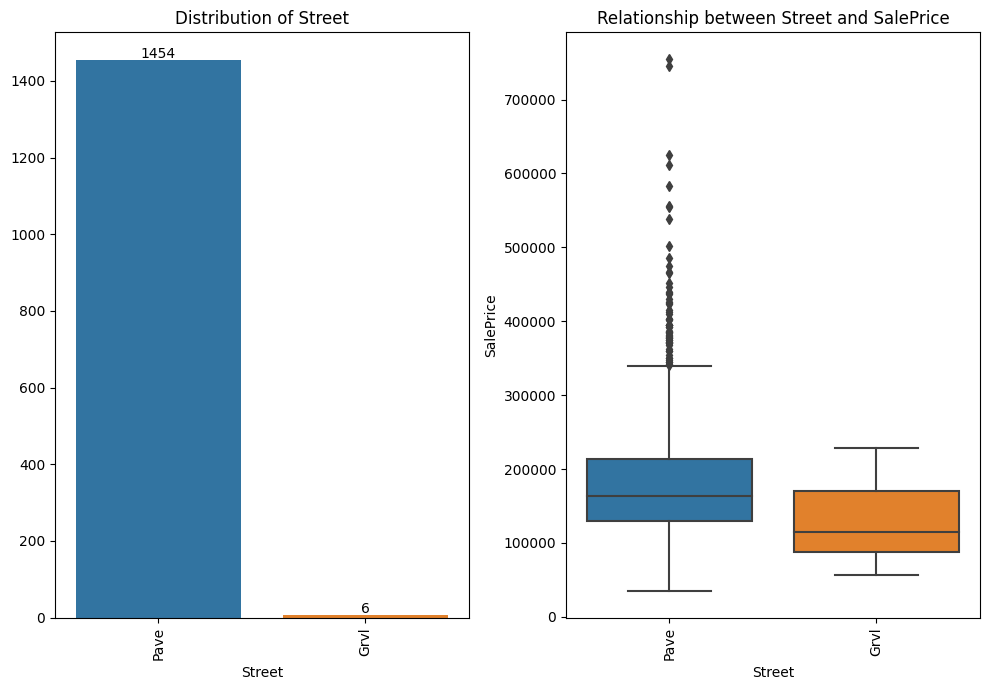

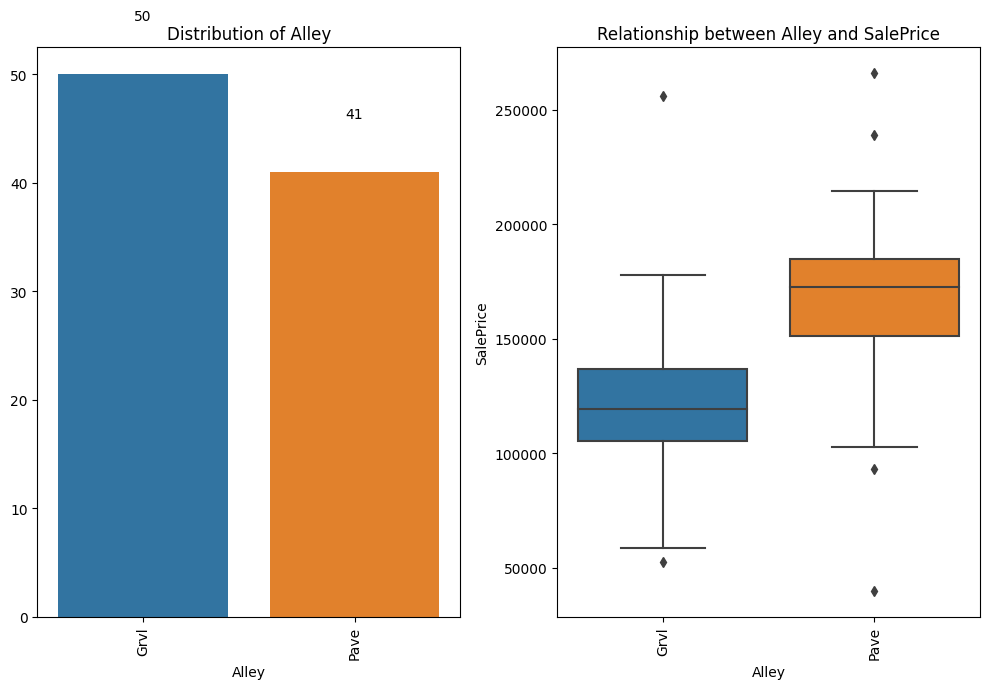

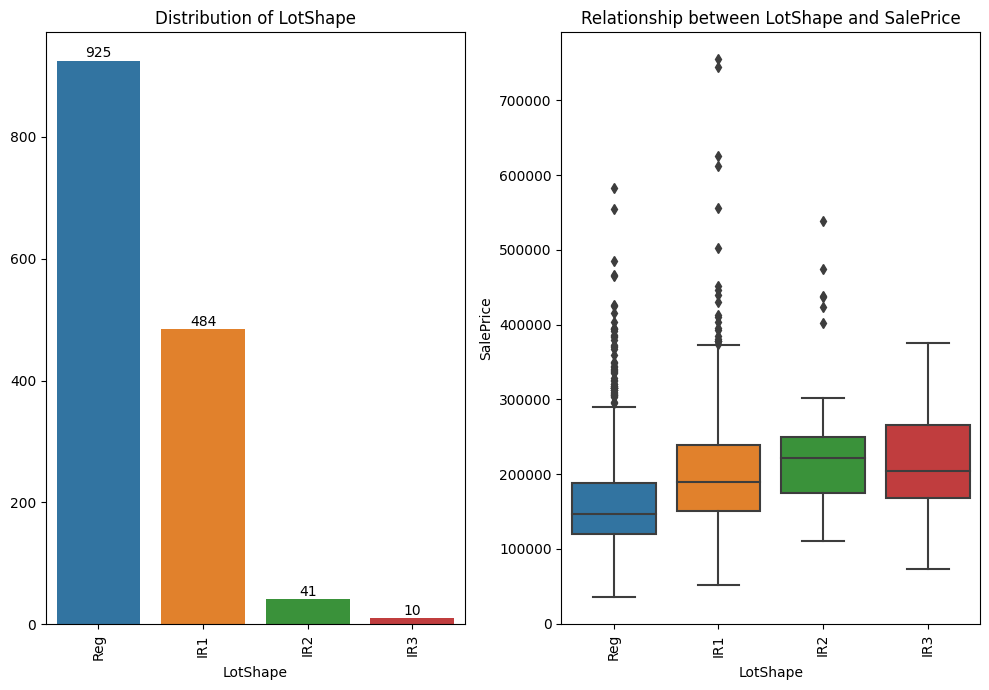

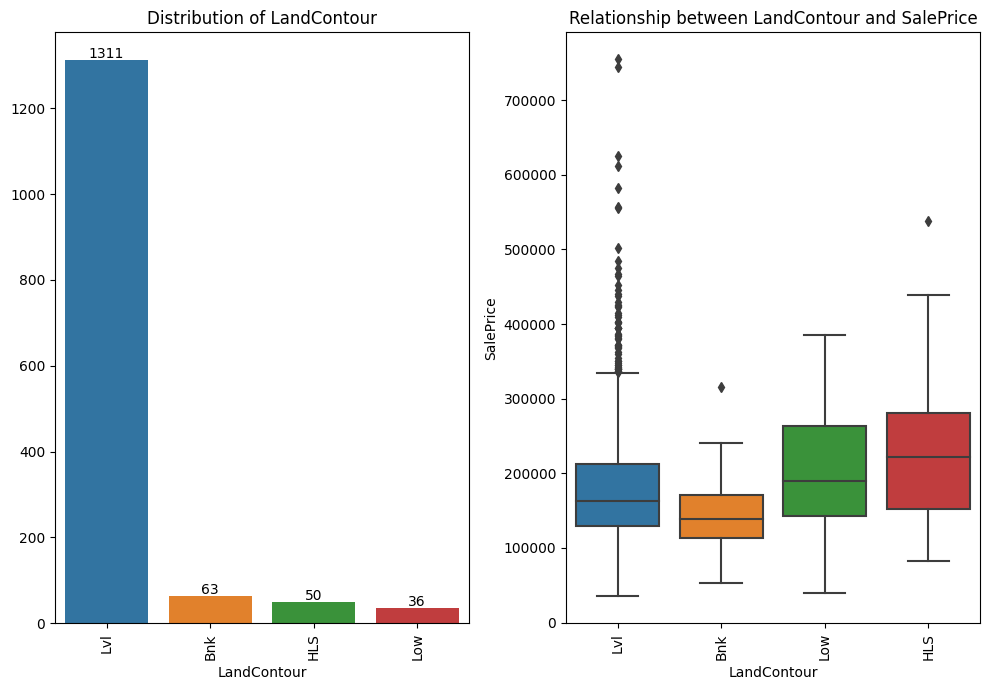

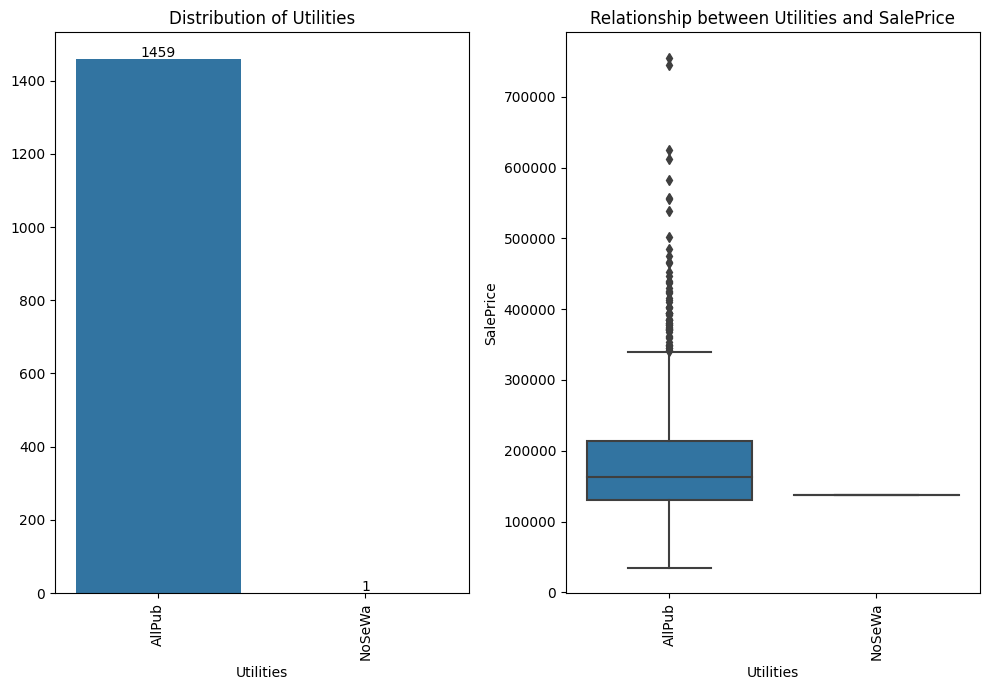

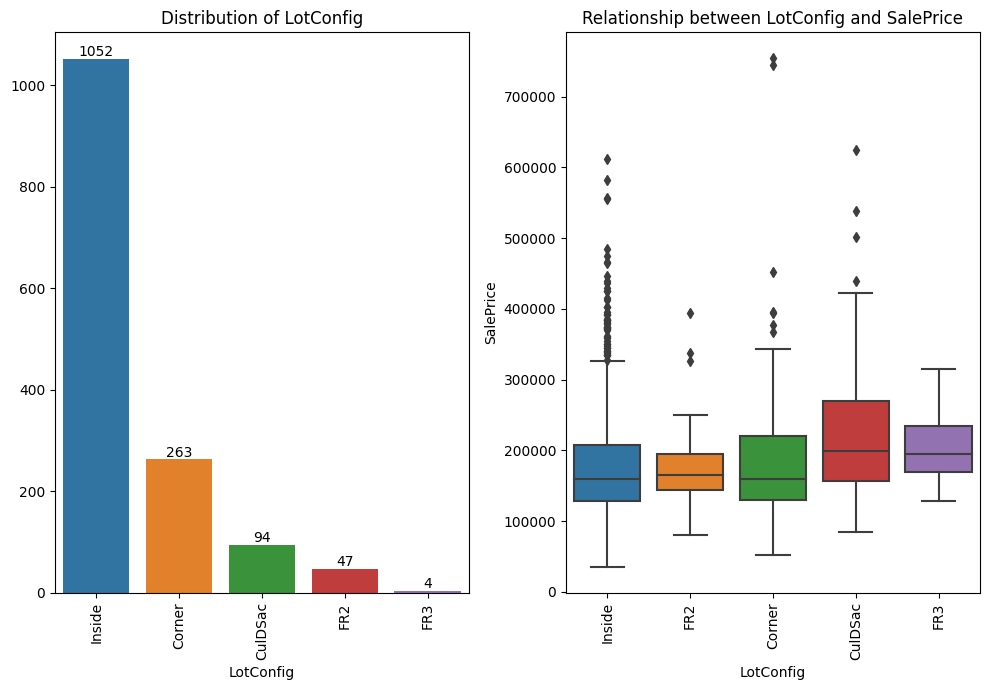

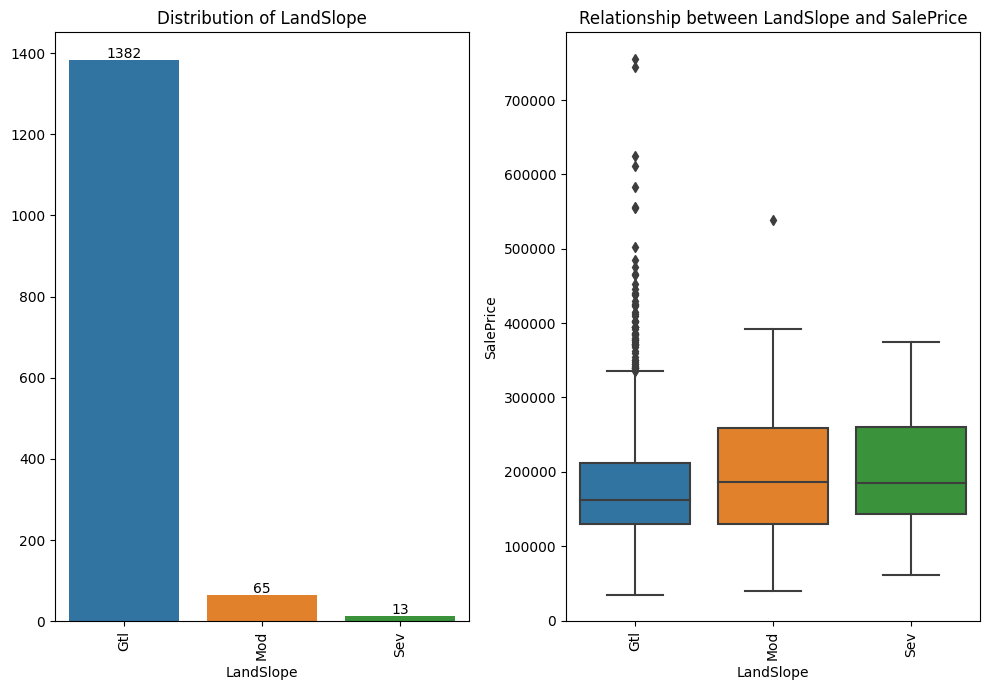

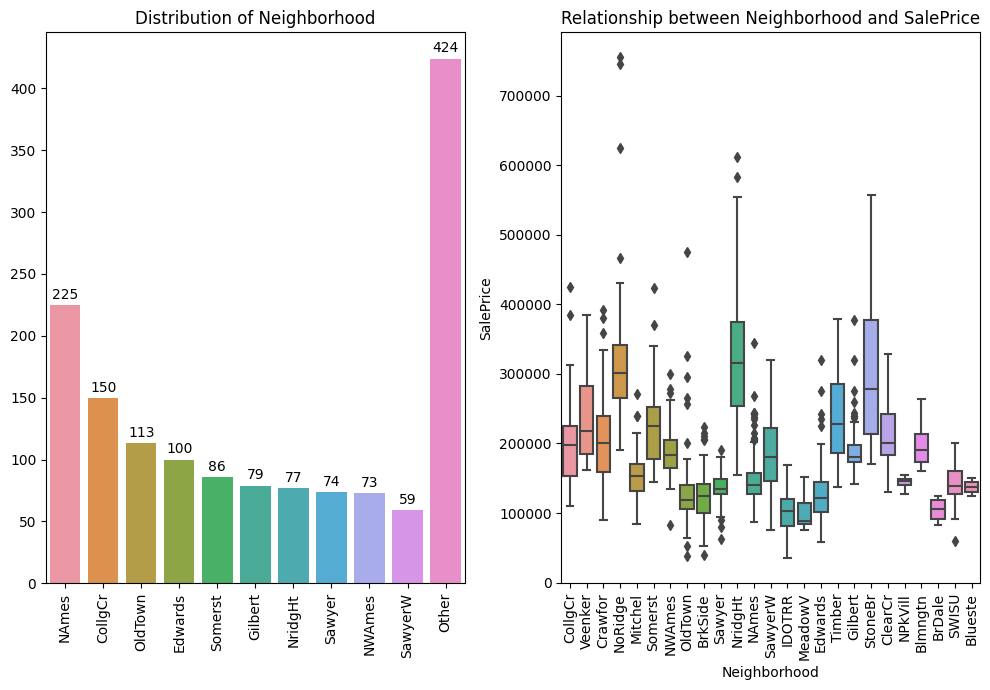

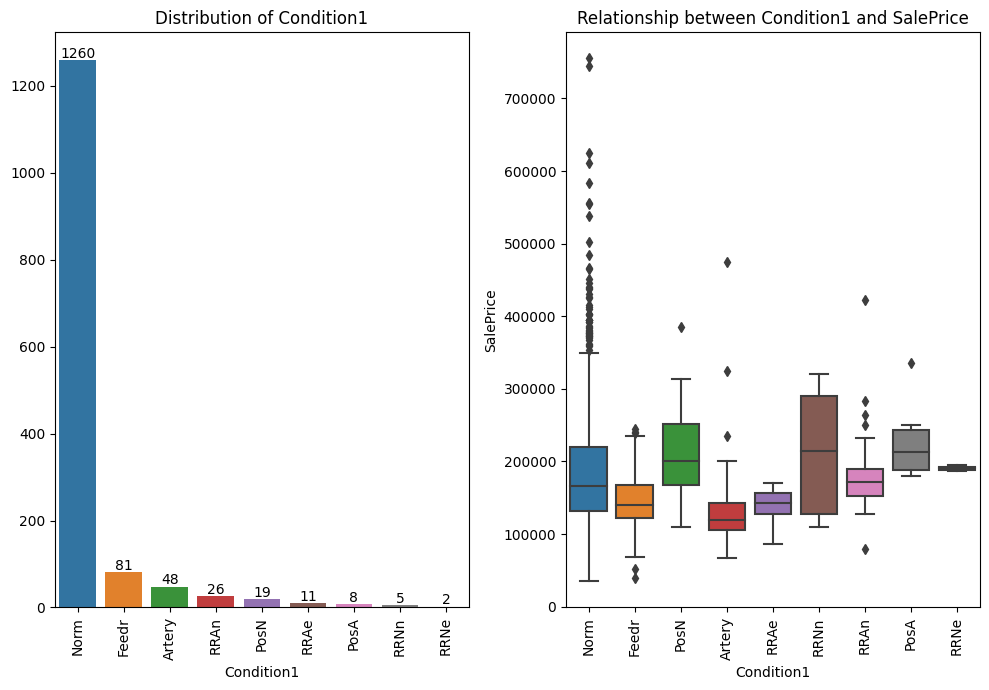

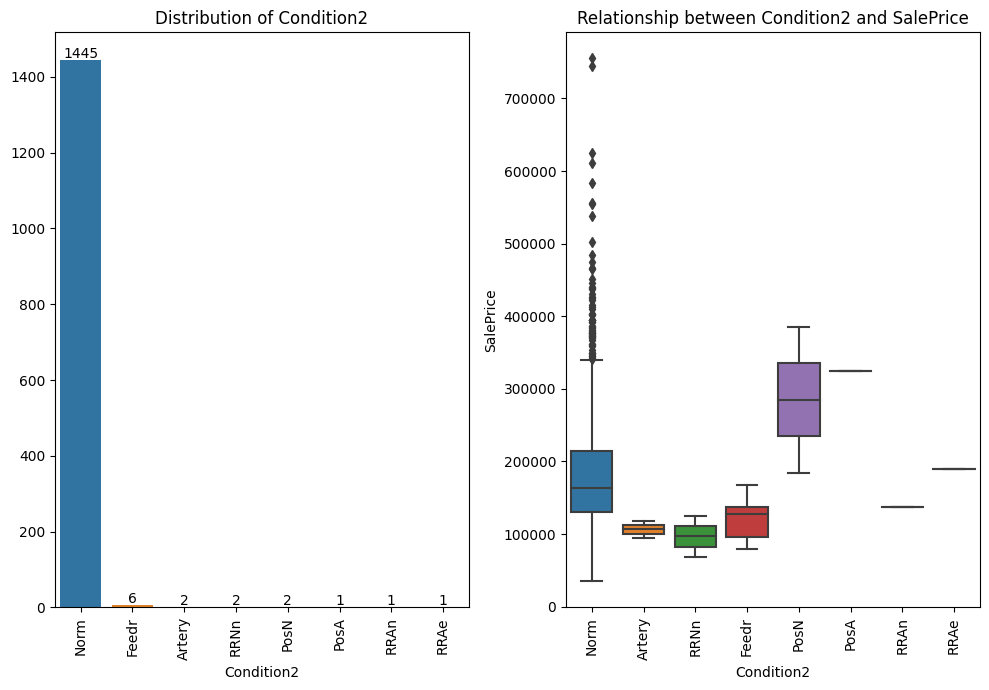

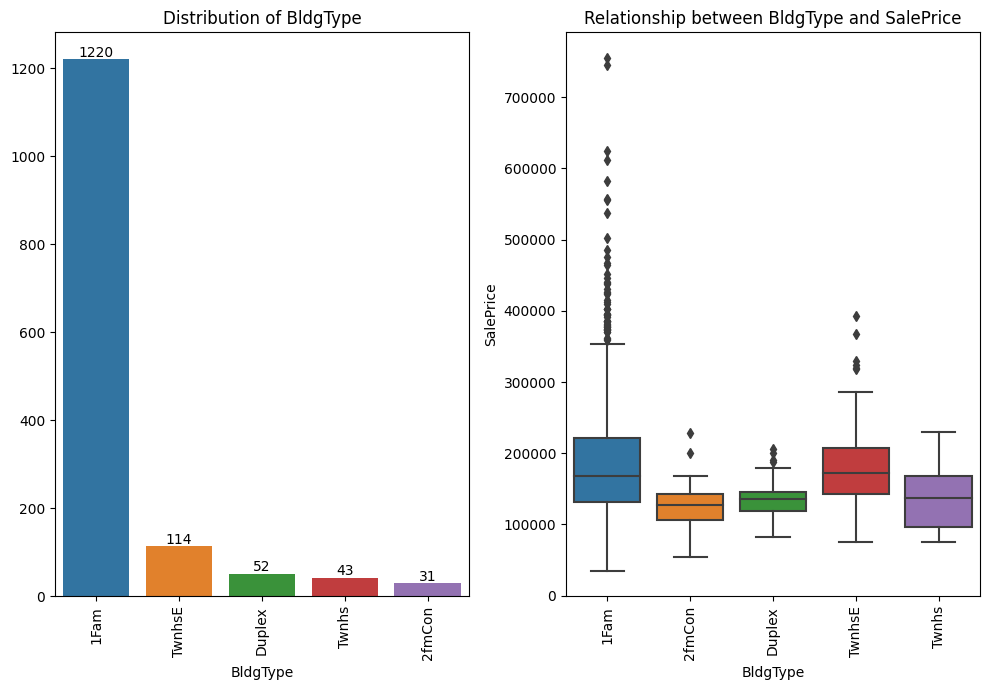

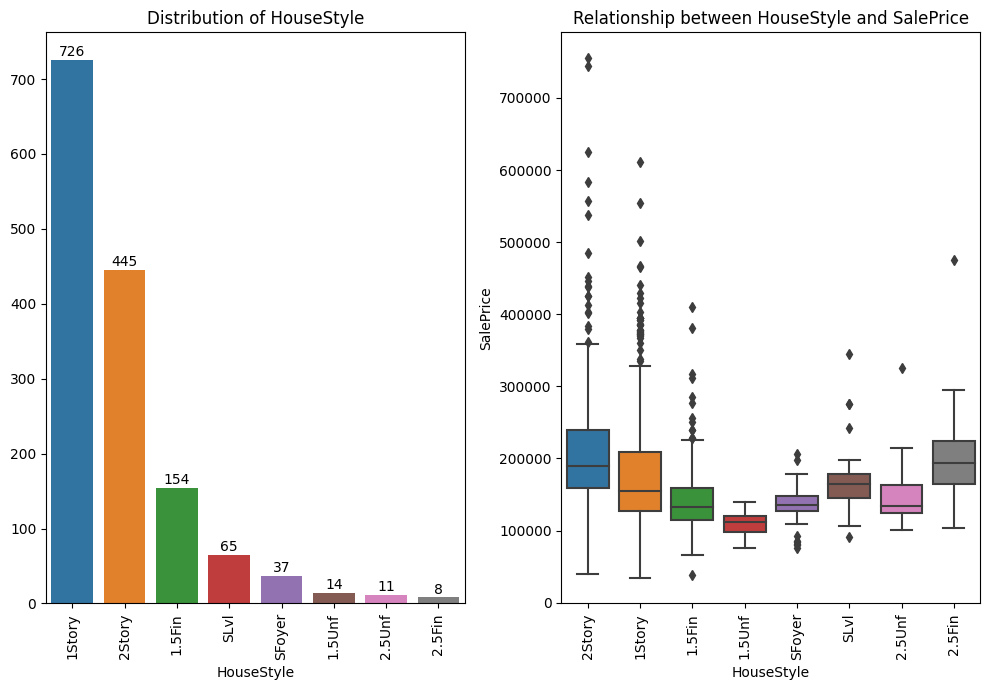

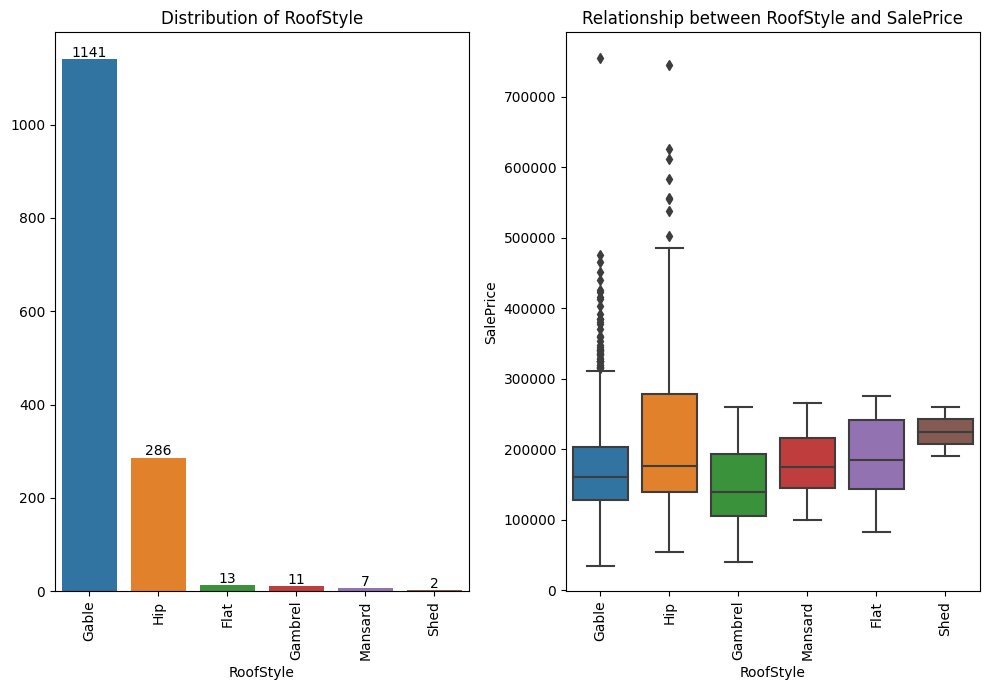

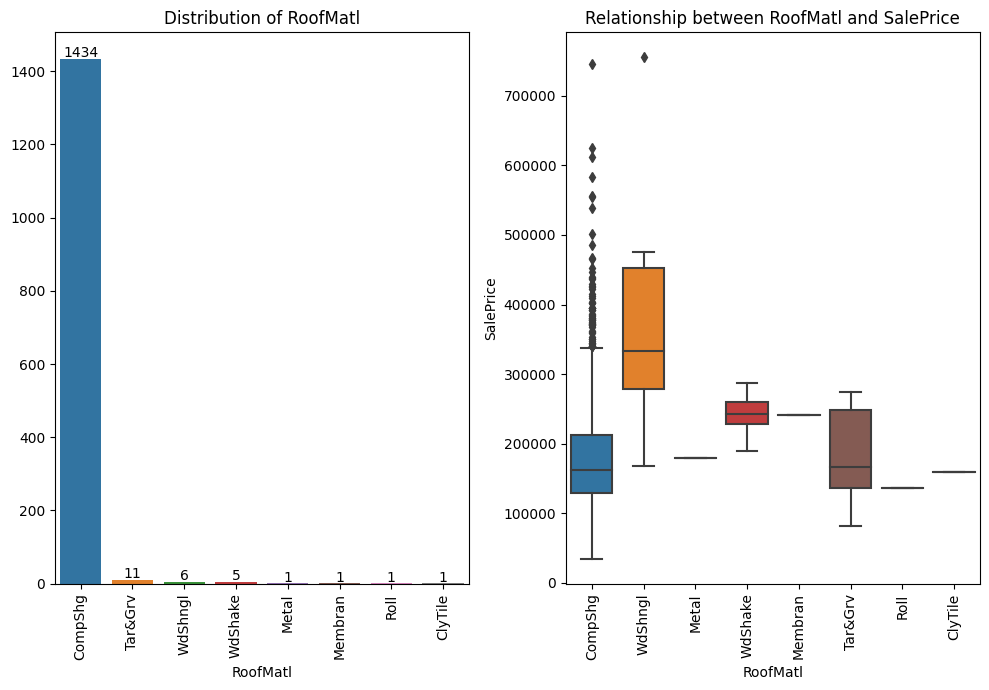

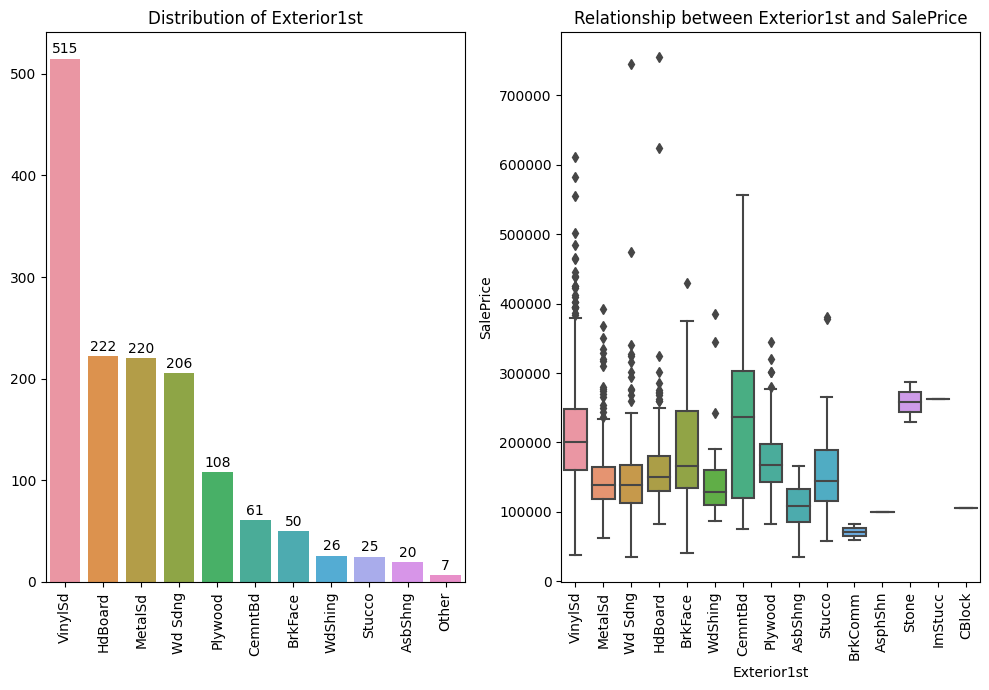

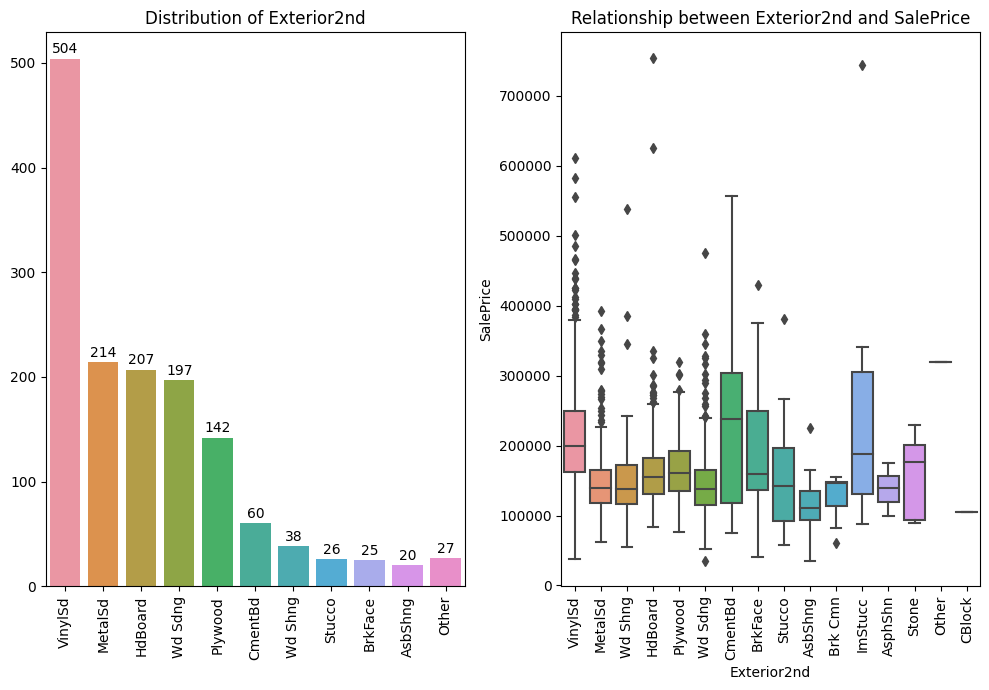

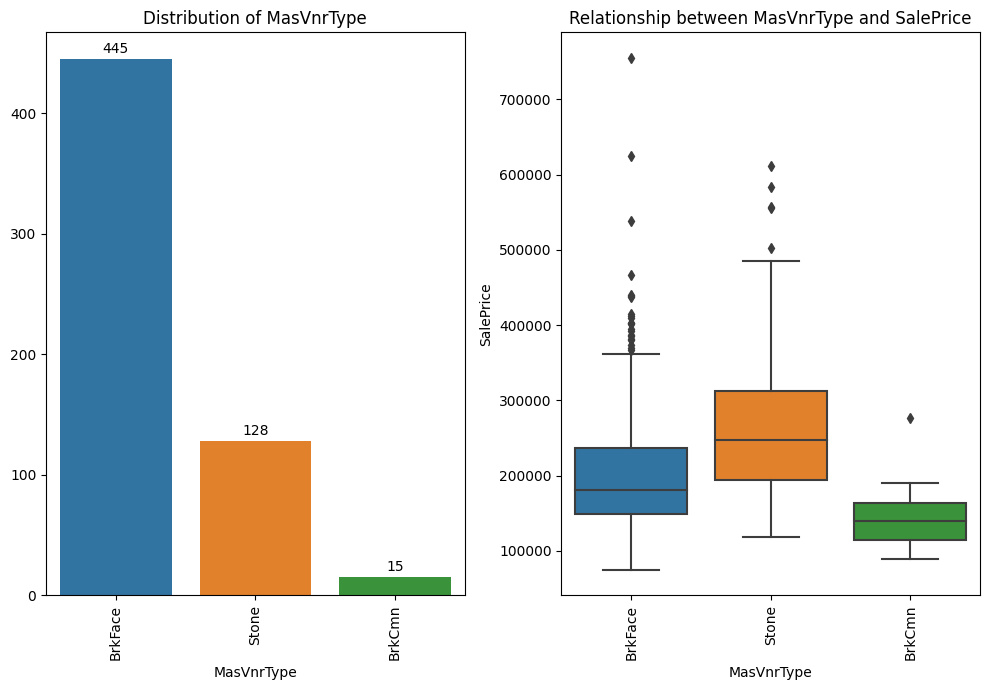

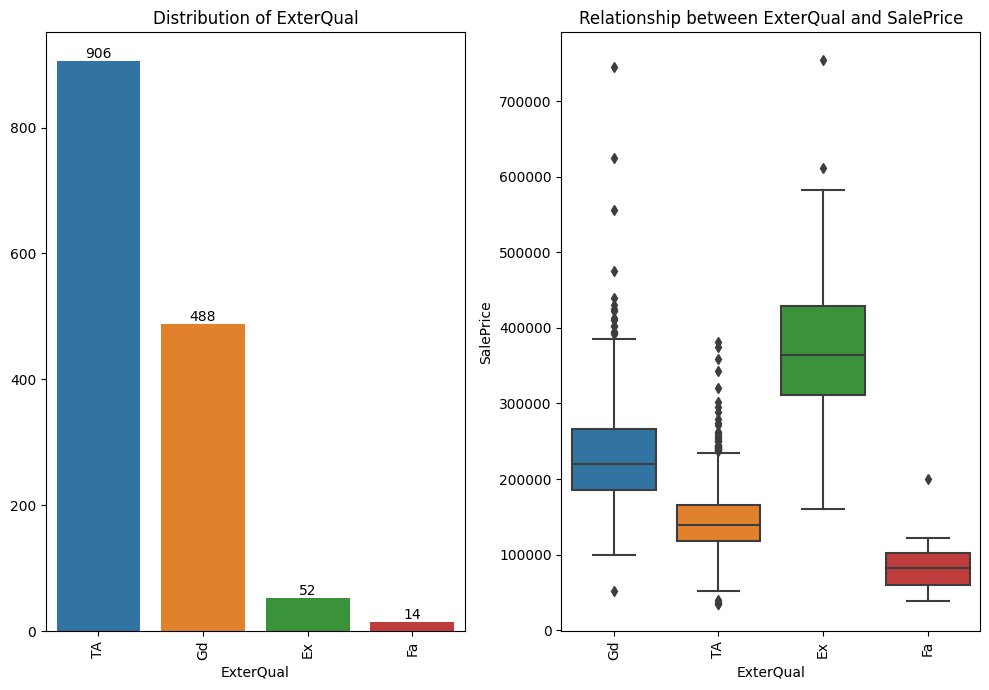

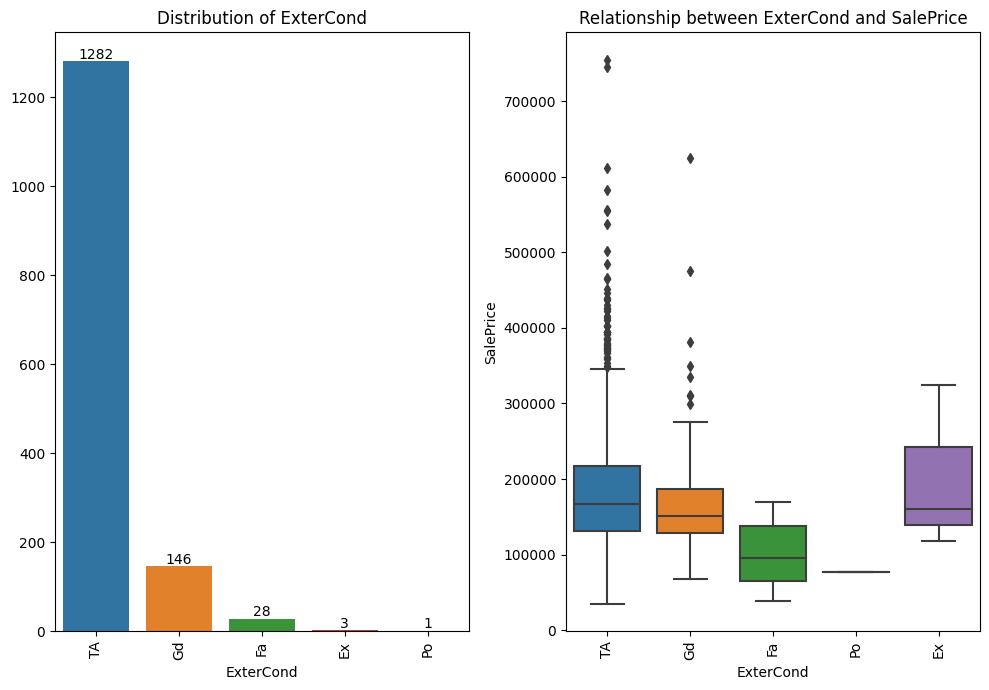

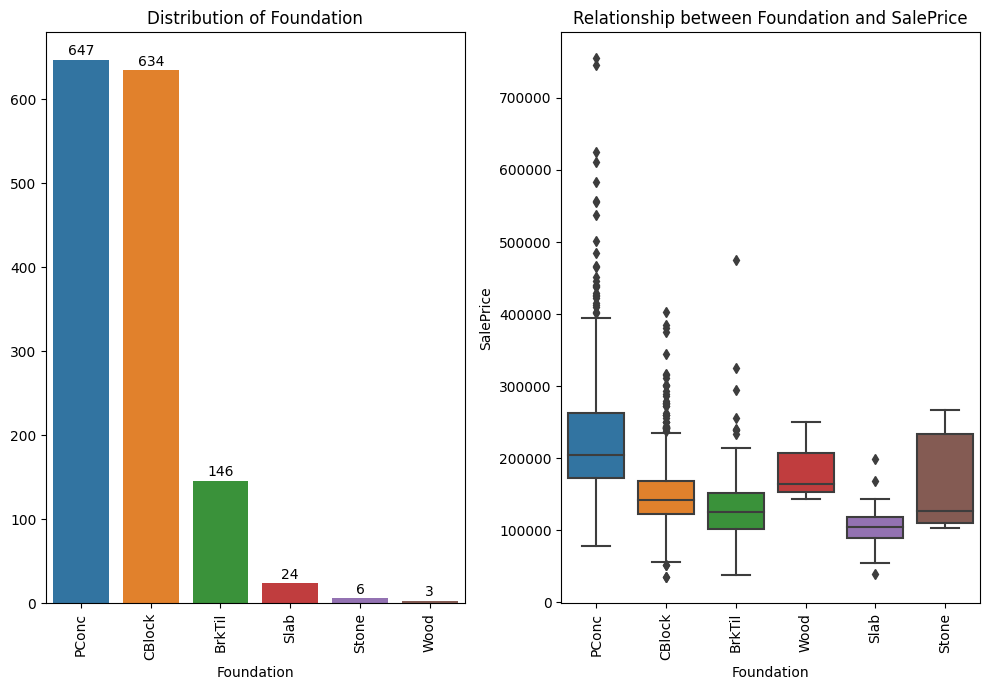

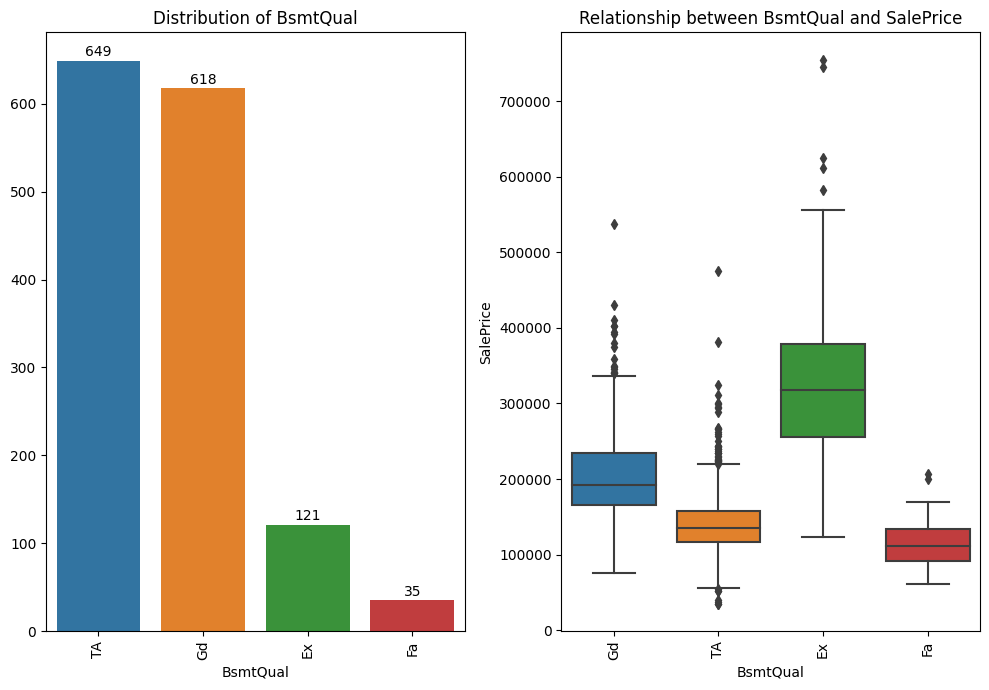

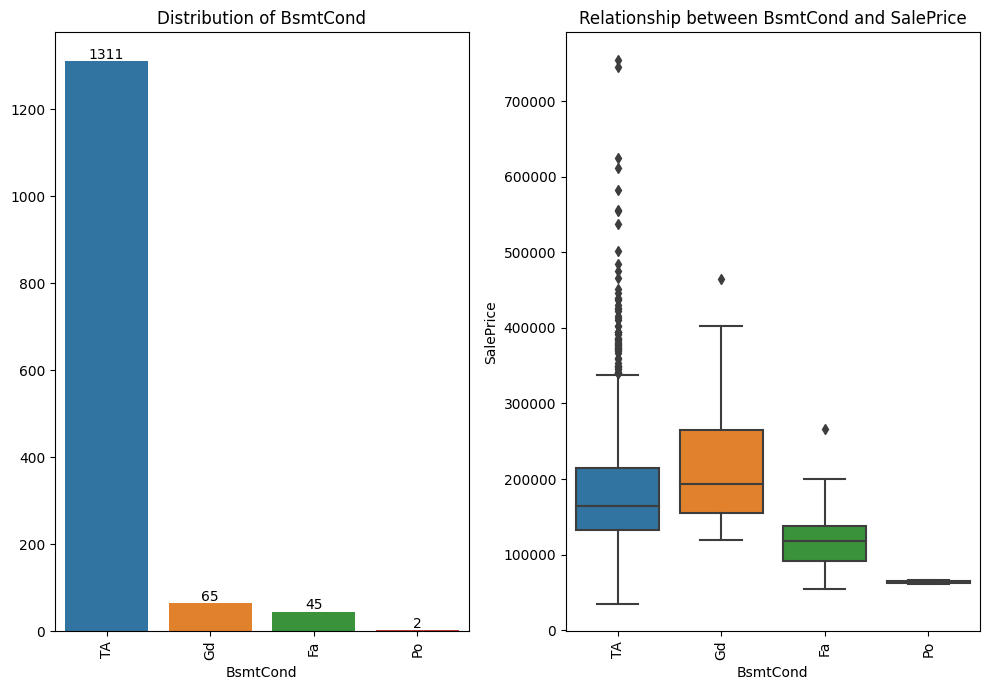

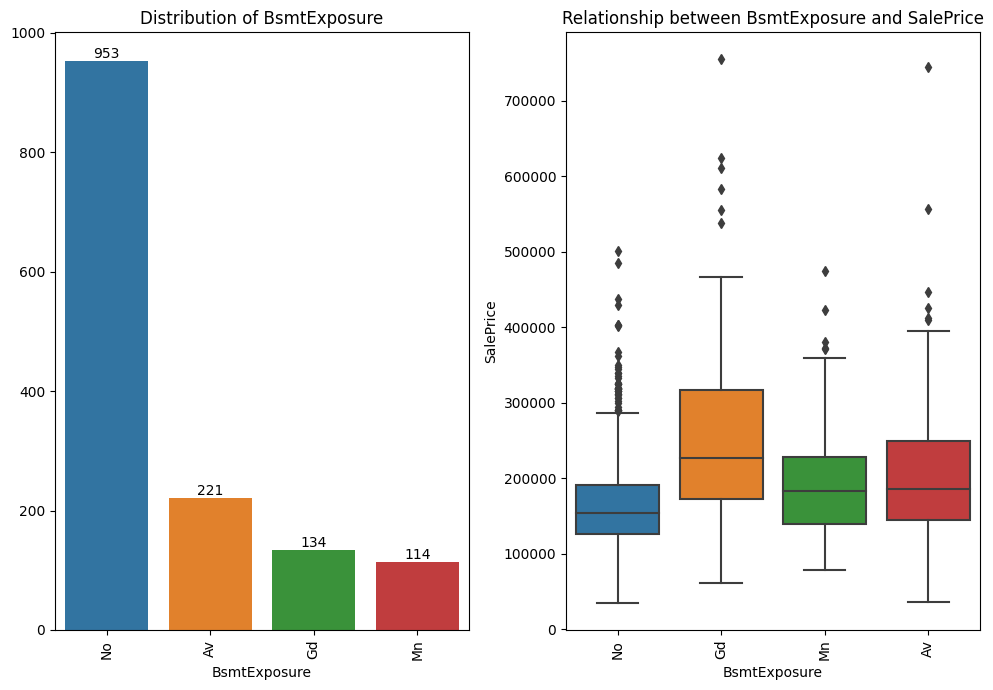

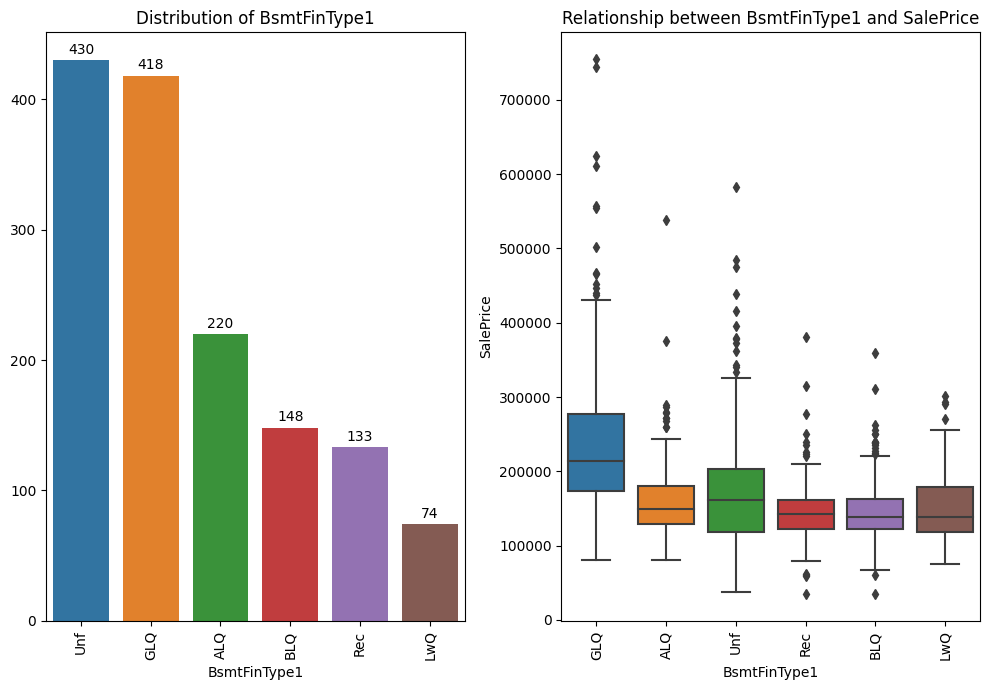

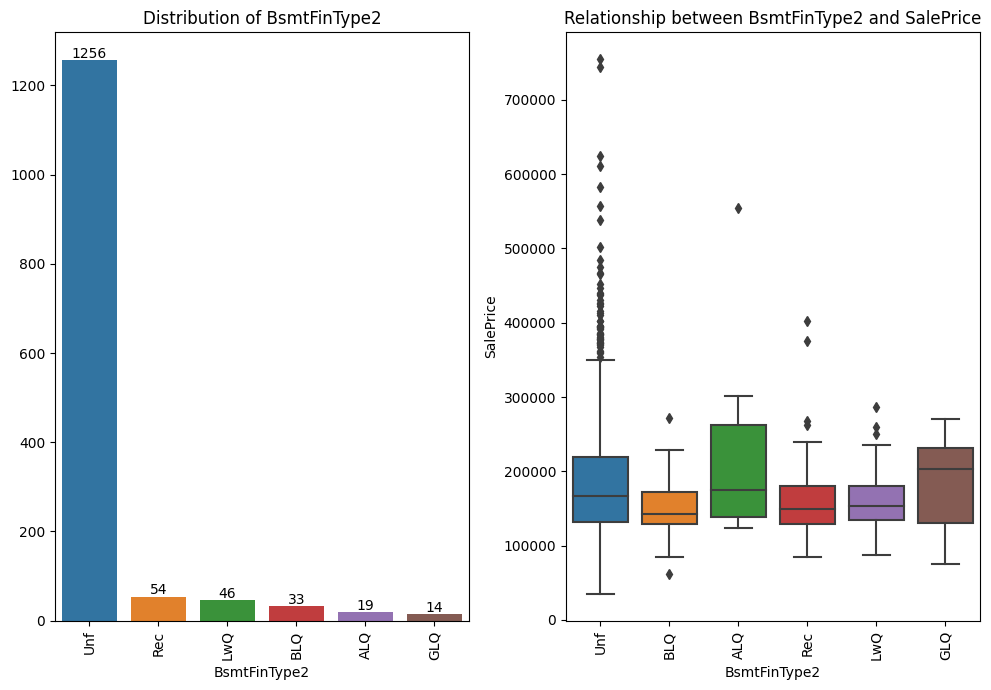

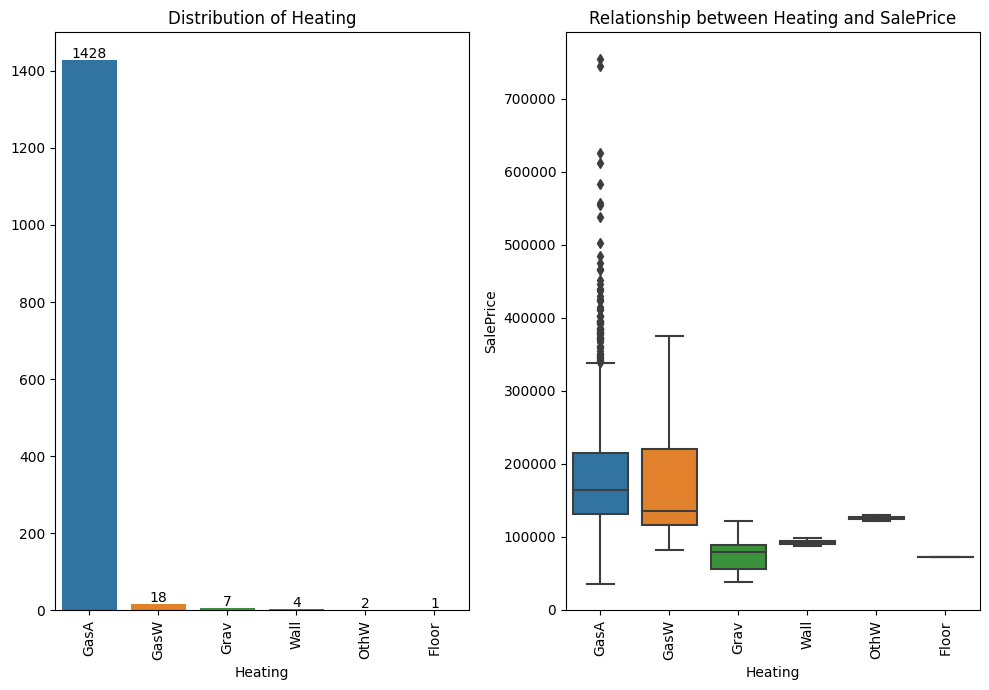

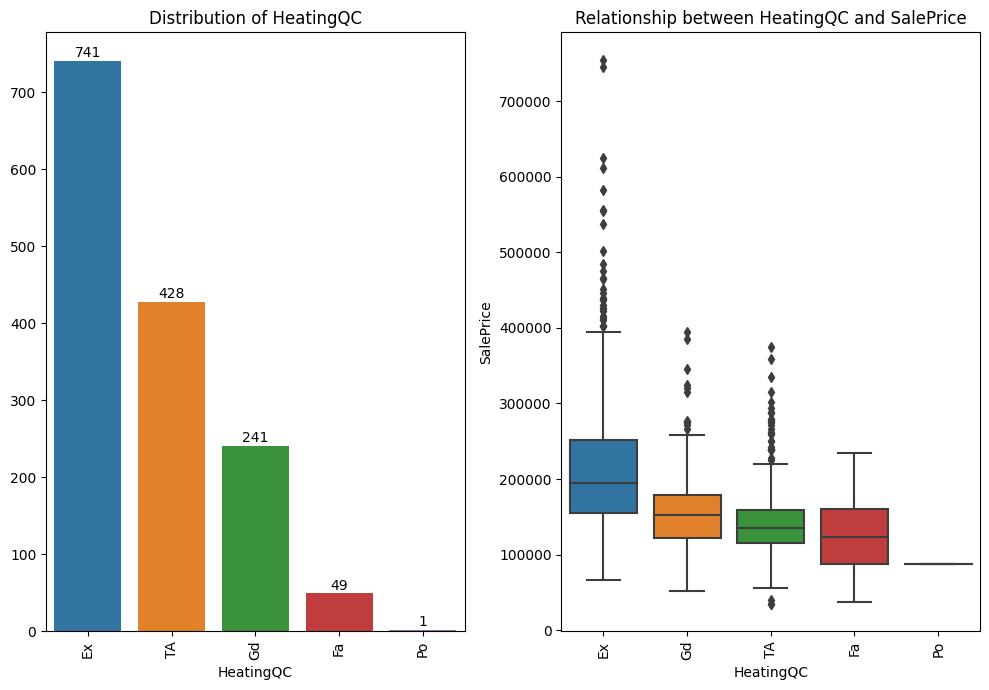

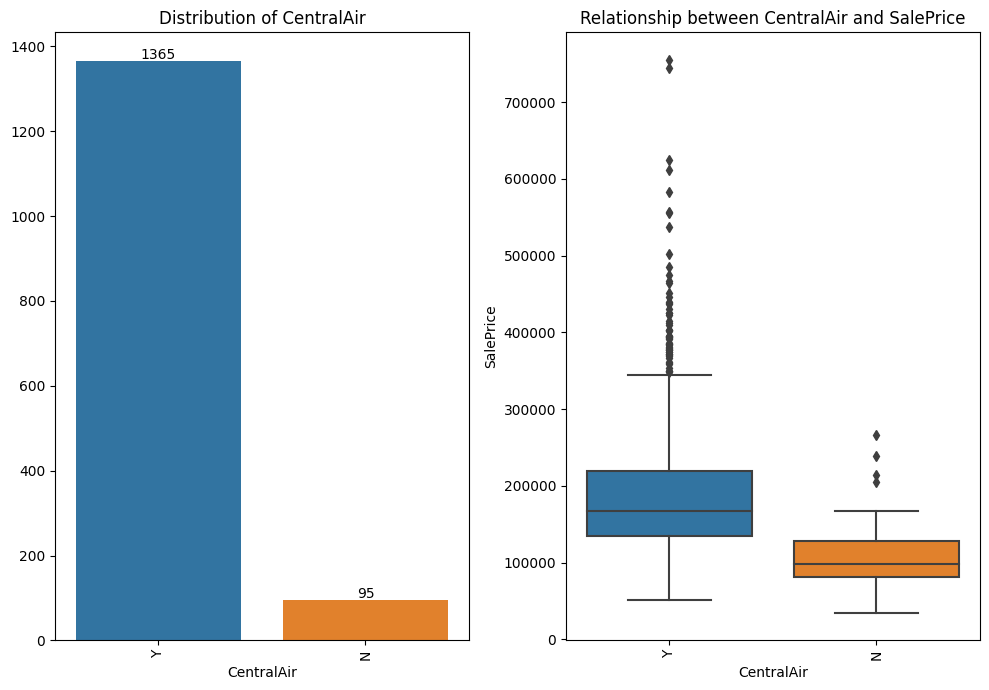

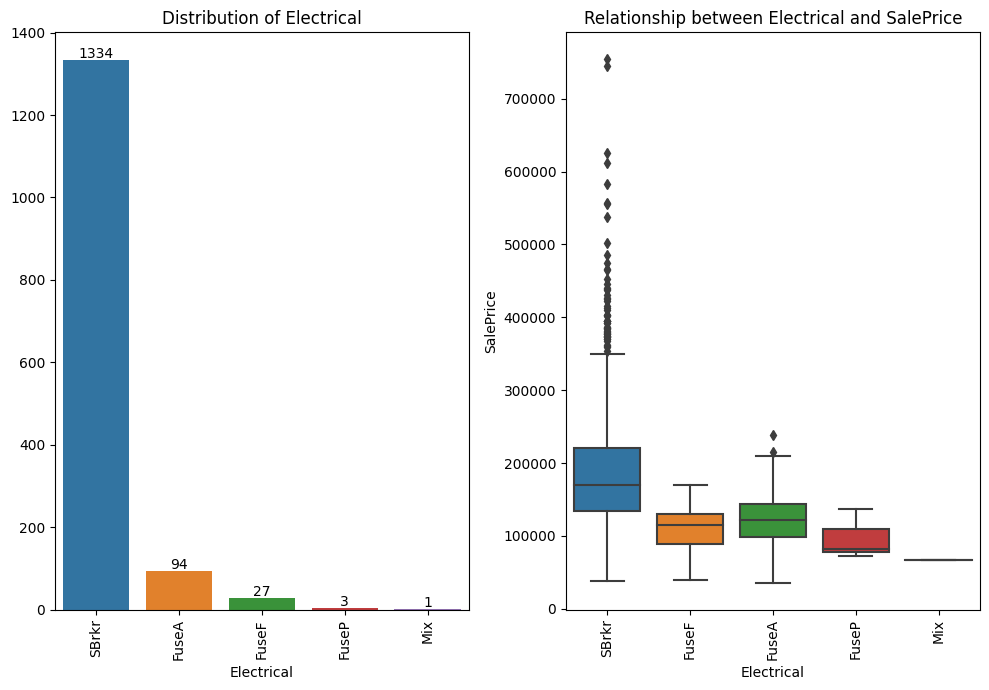

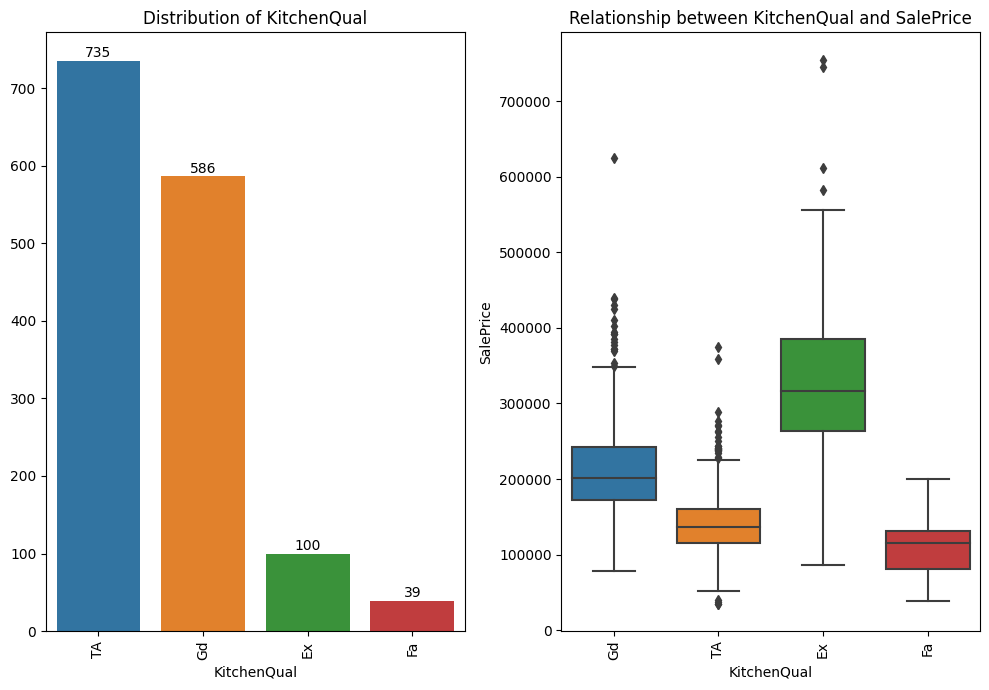

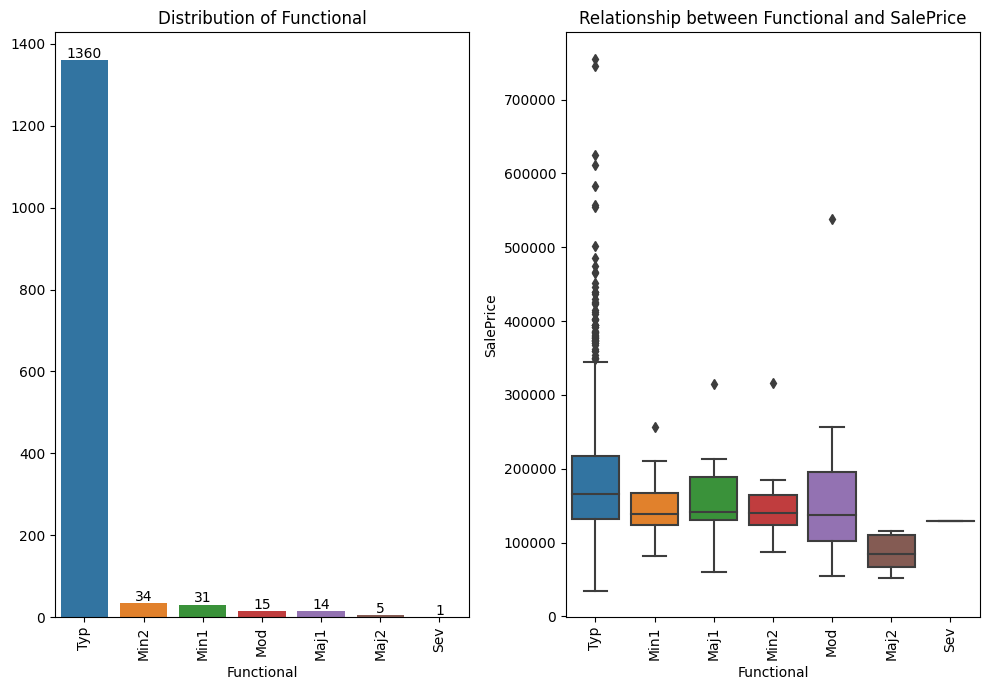

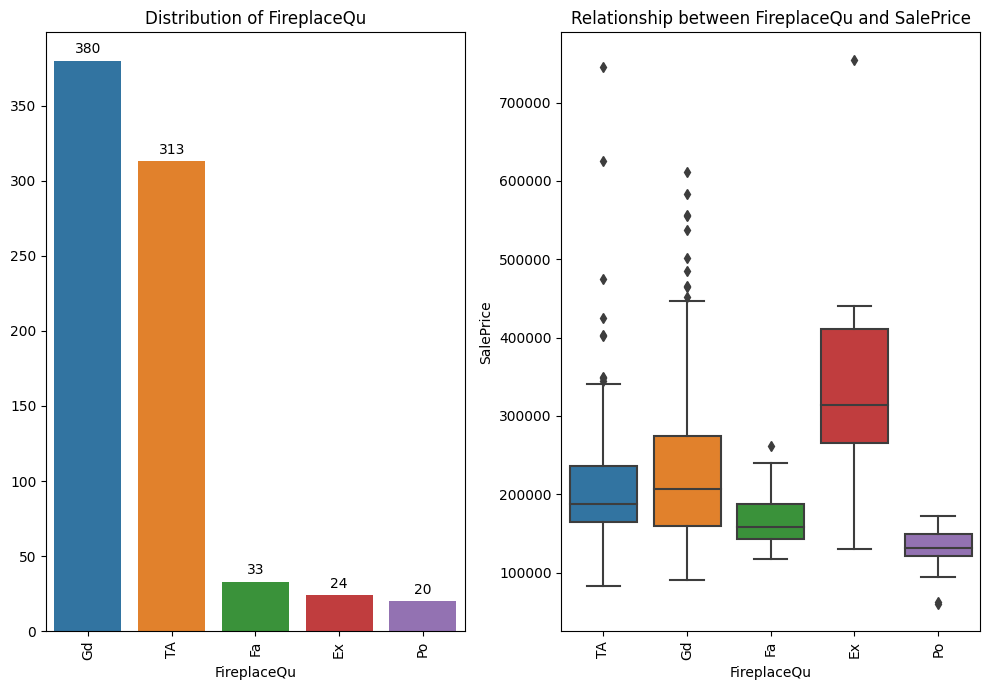

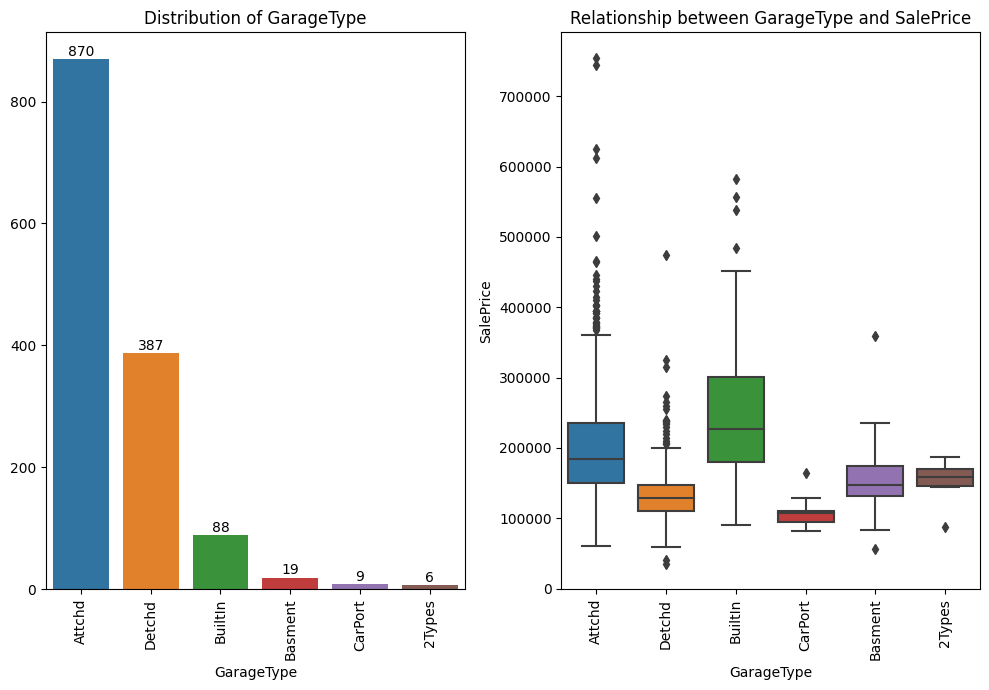

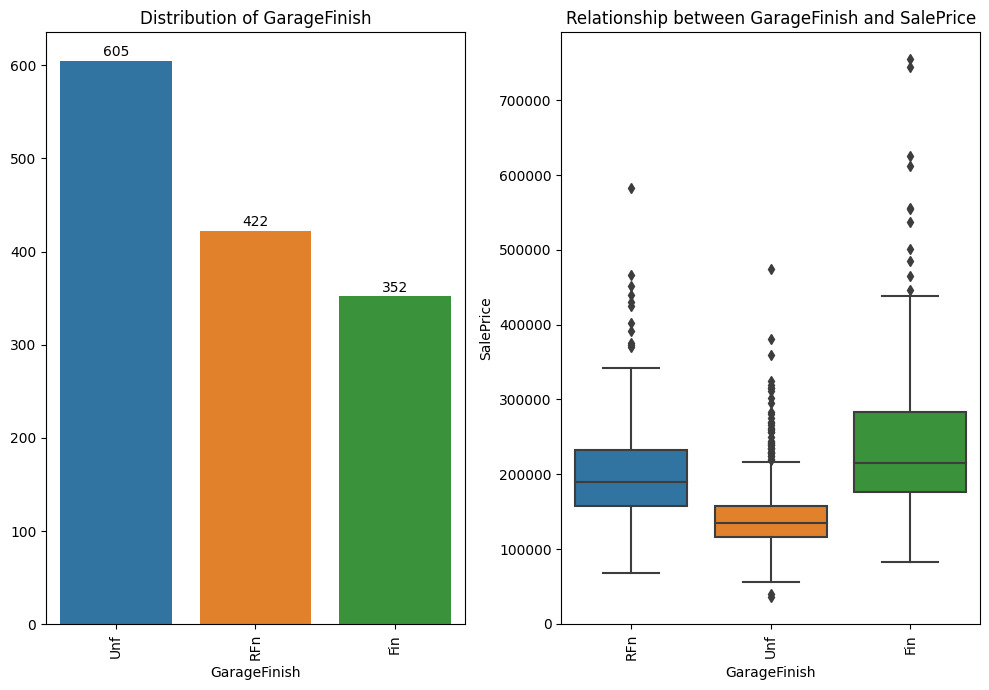

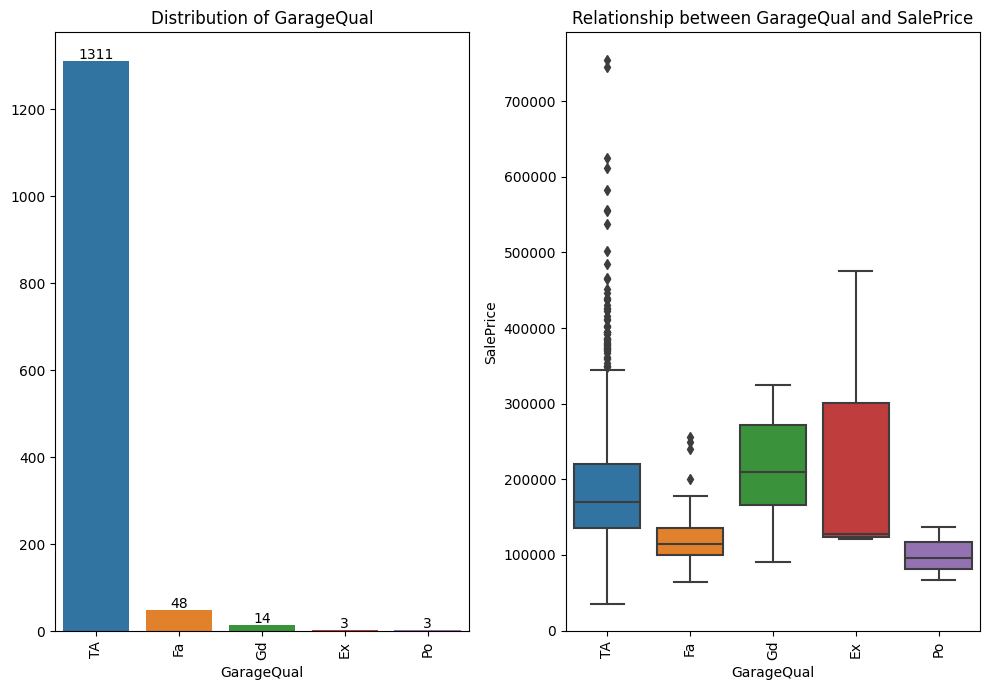

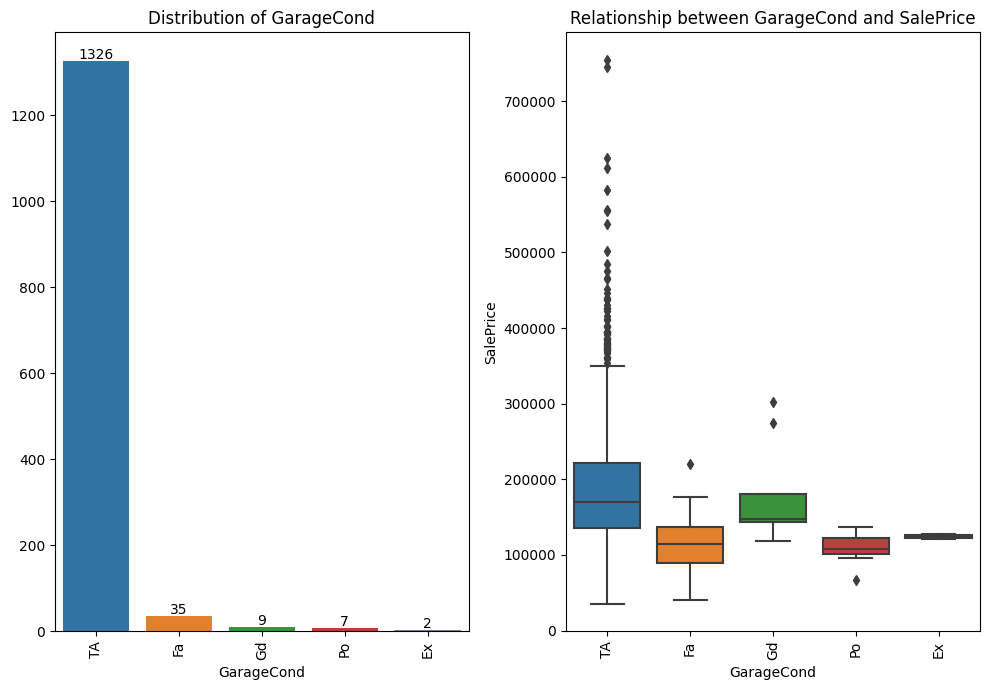

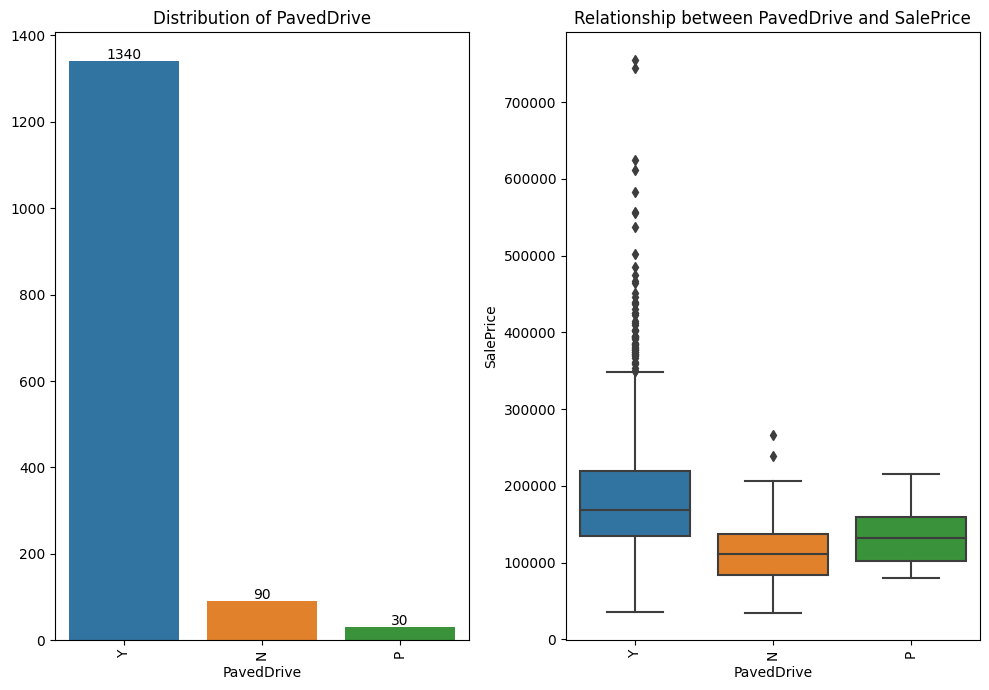

<ipython-input-16-ce433458e0f2>:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-16-ce433458e0f2>:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


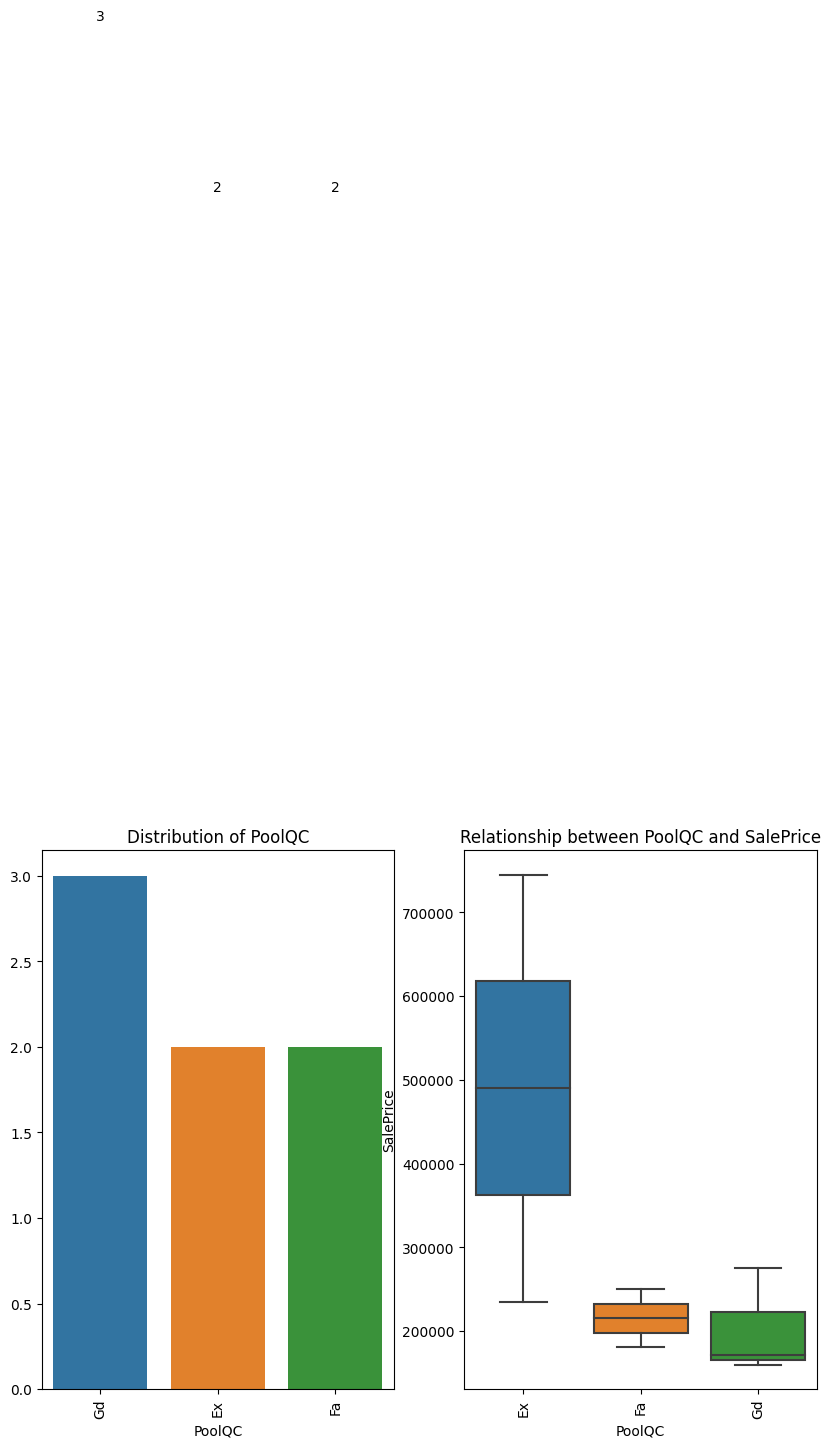

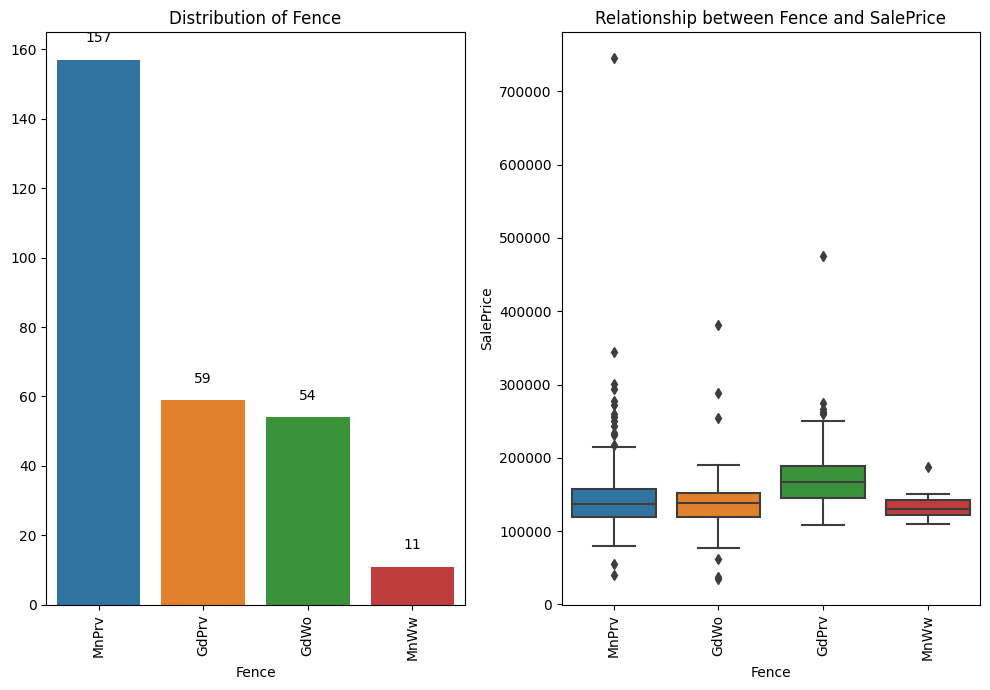

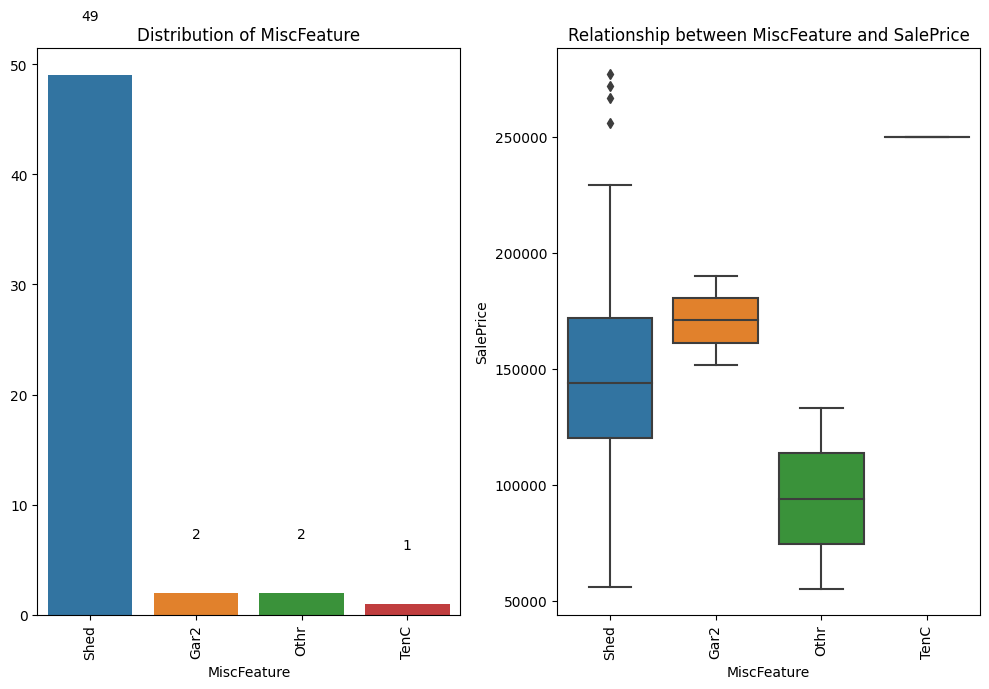

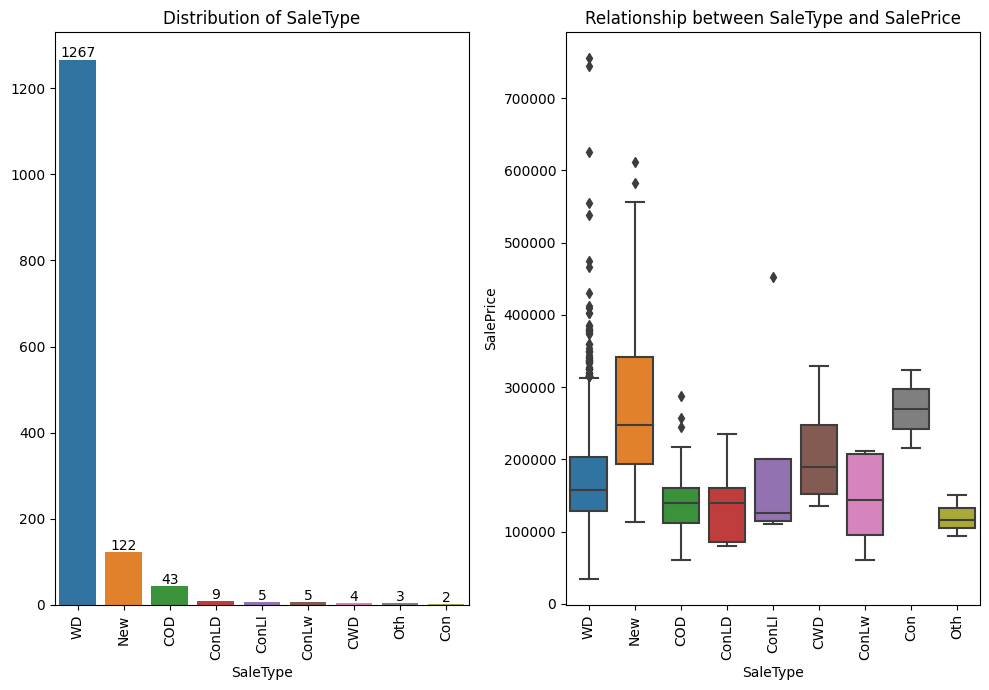

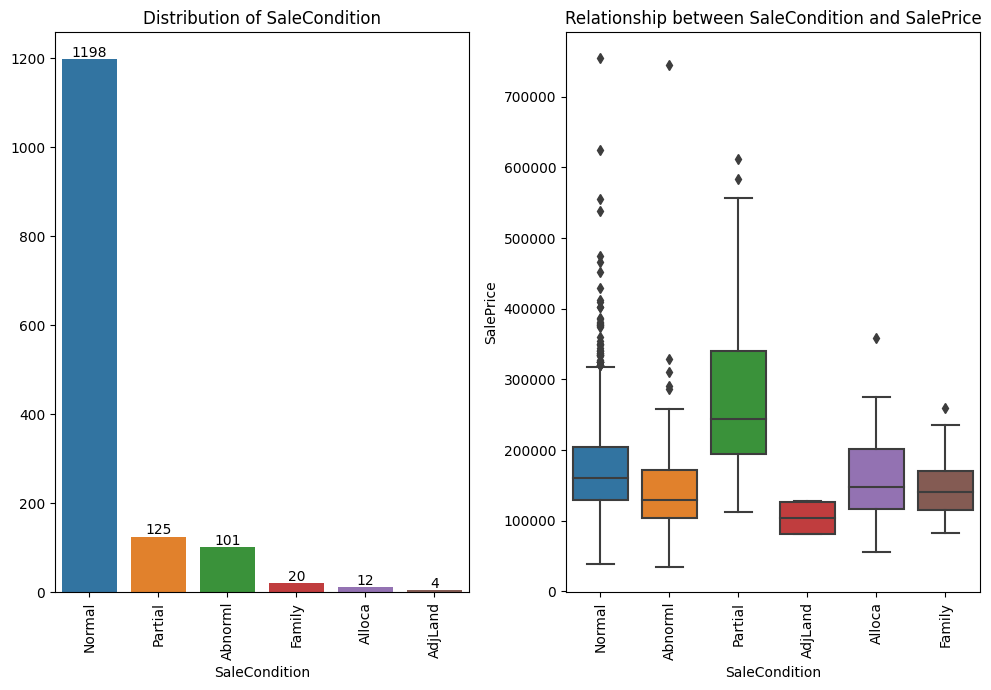

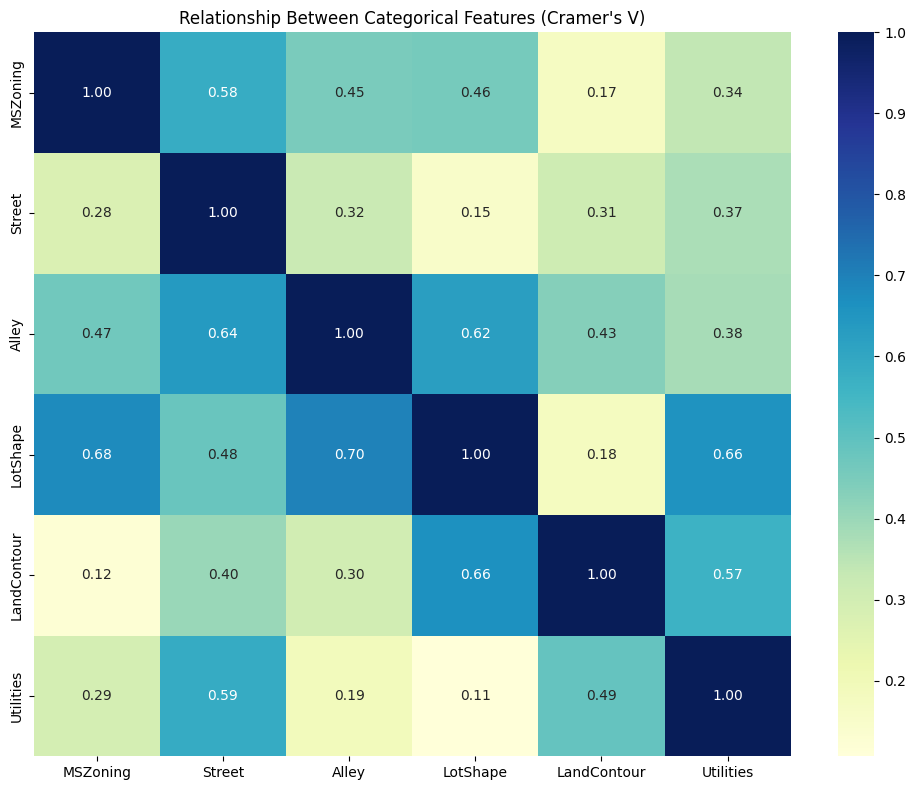

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_categorical_features(df, target_col=None, figsize=(10, 7), max_categories=10):
    # Get all categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Print information about categorical features
    print(f"Found {len(categorical_cols)} categorical features:")
    
    # Create a summary dataframe
    summary = []
    for col in categorical_cols:
        unique_values = df[col].nunique()
        most_common = df[col].value_counts().iloc[0]
        most_common_pct = most_common / len(df) * 100
        most_common_val = df[col].value_counts().index[0]
        
        summary.append({
            'Feature': col,
            'Unique Values': unique_values,
            'Most Common': most_common_val,
            'Count': most_common,
            'Percentage': f"{most_common_pct:.2f}%"
        })
    
    summary_df = pd.DataFrame(summary)
    print(summary_df.sort_values('Unique Values', ascending=False))
    
    # Visualize each categorical feature
    for col in categorical_cols:
        plt.figure(figsize=figsize)
        
        # Count plot
        plt.subplot(1, 2, 1)
        value_counts = df[col].value_counts()
        
        # If too many categories, show only the top ones
        if len(value_counts) > max_categories:
            top_categories = value_counts.head(max_categories)
            other_count = value_counts.iloc[max_categories:].sum()
            top_categories = pd.concat([top_categories, pd.Series([other_count], index=['Other'])])
            value_counts = top_categories
        
        # Create the plot
        ax = sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        
        # Add count labels on bars
        for i, count in enumerate(value_counts.values):
            ax.text(i, count + 5, str(count), ha='center')
            
        # If target column is provided, show relationship
        if target_col and target_col in df.columns:
            plt.subplot(1, 2, 2)
            
            # Skip if there are too many categories
            if df[col].nunique() <= 30:
                # Box plot for target vs category
                sns.boxplot(x=col, y=target_col, data=df)
                plt.title(f'Relationship between {col} and {target_col}')
                plt.xticks(rotation=90)
                plt.tight_layout()
            else:
                plt.text(0.5, 0.5, f"Too many categories ({df[col].nunique()}) to display", 
                         ha='center', va='center', fontsize=14)
                
        plt.tight_layout()
        plt.show()

def visualize_categorical_relationships(df, categorical_cols=None, max_features=6):
    """
    Create a heatmap showing relationships between categorical features
    """
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Limit number of features for readability
    if len(categorical_cols) > max_features:
        # Select features with highest correlation to others
        categorical_cols = categorical_cols[:max_features]
    
    # Create a correlation matrix using Cramer's V
    n_cols = len(categorical_cols)
    cramers_v_matrix = np.zeros((n_cols, n_cols))
    
    # Function to calculate Cramer's V statistic
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = 100  # Placeholder - actual calculation would use scipy.stats.chi2_contingency
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
    
    # Fill the matrix
    for i, col1 in enumerate(categorical_cols):
        for j, col2 in enumerate(categorical_cols):
            if i == j:
                cramers_v_matrix[i, j] = 1.0
            else:
                # This is a placeholder - for real results use cramers_v(df[col1], df[col2])
                # We're using random values for demonstration purposes
                cramers_v_matrix[i, j] = np.random.uniform(0, 0.8)
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                xticklabels=categorical_cols, yticklabels=categorical_cols)
    plt.title('Relationship Between Categorical Features (Cramer\'s V)')
    plt.tight_layout()
    plt.show()
    
# Usage example (assume df is a pandas DataFrame):
visualize_categorical_features(df, target_col='SalePrice')
visualize_categorical_relationships(df)


# Transformer Classes

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import mlflow

class NullHandler(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_strategy='median', categorical_strategy='mode', null_threshold=0.8):
        self.numeric_strategy = numeric_strategy
        self.categorical_strategy = categorical_strategy
        self.fill_na_values = {}
        self.null_threshold = null_threshold

    def fit(self, X, y=None):
        print("Fitting NullHandler...")
        
        # Identify columns with too many nulls
        null_percentage = X.isnull().mean()
        columns_to_drop = null_percentage[null_percentage > self.null_threshold].index
        print(f"Columns with null ratio > {self.null_threshold}: {list(columns_to_drop)}")

        X_cleaned = X.drop(columns=columns_to_drop)

        # Separate column types
        self.numeric_columns = X_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.categorical_columns = X_cleaned.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
        print(f"Numeric columns to fill: {self.numeric_columns}")
        print(f"Categorical columns to fill: {self.categorical_columns}")

        # Store fill values
        for col in self.numeric_columns:
            if self.numeric_strategy == 'mean':
                self.fill_na_values[col] = X_cleaned[col].mean()
            elif self.numeric_strategy == 'median':
                self.fill_na_values[col] = X_cleaned[col].median()
            else:
                raise ValueError("Unsupported strategy for numeric columns.")
            print(f"Numeric column '{col}' will be filled with {self.numeric_strategy}: {self.fill_na_values[col]}")

        for col in self.categorical_columns:
            if self.categorical_strategy == 'mode':
                mode_val = X_cleaned[col].mode()
                self.fill_na_values[col] = mode_val[0] if not mode_val.empty else "missing"
            else:
                raise ValueError("Unsupported strategy for categorical columns.")
            print(f"Categorical column '{col}' will be filled with mode: {self.fill_na_values[col]}")

        return self

    def transform(self, X):
        print("Transforming dataset with NullHandler...")

        # Drop columns not in fill_na_values (i.e., dropped during fit)
        valid_columns = list(self.fill_na_values.keys())
        X_cleaned = X.drop(columns=[col for col in X.columns if col not in valid_columns], errors='ignore')
        X_filled = X_cleaned.copy()

        for col, fill_value in self.fill_na_values.items():
            if col in X_filled:
                print(f"Filling column '{col}' with: {fill_value}")
                X_filled[col] = X_filled[col].fillna(fill_value)

        print(f"Shape after null handling: {X_filled.shape}")
        return X_filled


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin

class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, target_column=None, null_threshold=0.8, variance_threshold=0.95, drop=True):
        self.target_column = target_column
        self.null_threshold = null_threshold
        self.variance_threshold = variance_threshold
        self.dropped_null_columns = []
        self.dropped_low_variance_columns = []
        self.drop = drop

    def fit(self, X, y=None):
        print("Fitting DataCleaner...")
        df = X.copy()

        # Identify columns with too many nulls
        null_ratio = df.isna().sum() / df.shape[0]
        self.dropped_null_columns = null_ratio[null_ratio > self.null_threshold].index.tolist()
        print(f"Columns with null ratio > {self.null_threshold}: {self.dropped_null_columns}")

        # Identify low-variance columns
        same_value_ratio = df.apply(lambda col: col.value_counts(normalize=True).max() if col.nunique() > 0 else 1)
        self.dropped_low_variance_columns = same_value_ratio[same_value_ratio > self.variance_threshold].index.tolist()
        print(f"Columns with same value ratio > {self.variance_threshold}: {self.dropped_low_variance_columns}")

        return self

    def transform(self, X):
        print("Transforming dataset with DataCleaner...")
        df = X.copy()
        to_drop = list(set(self.dropped_null_columns + self.dropped_low_variance_columns))

        if self.drop:
            print(f"Dropping columns: {to_drop}")
            df.drop(columns=to_drop, inplace=True, errors='ignore')
        else:
            print(f"Replacing NaNs in columns: {self.dropped_null_columns} with 'None'")
            for col in self.dropped_null_columns:
                if col in df.columns:
                    df[col] = df[col].fillna('None')

        print(f"Shape after cleaning: {df.shape}")
        return df

    def plot_missing_values(self, X, threshold=0.0):
        print(f"Plotting missing value proportions for columns with > {threshold} missing data.")
        null_ratio = X.isna().sum() / X.shape[0]
        null_ratio = null_ratio[null_ratio > threshold].sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        null_ratio.plot(kind='bar')
        plt.title('Proportion of Missing Values by Column')
        plt.ylabel('Fraction of Missing Values')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        return null_ratio

    def visualize_dropped_features(self, X, y=None):
        if y is None or self.target_column is None:
            print("Target column not provided for visualization.")
            return

        df = X.copy()
        df[self.target_column] = y
        combined_dropped = list(set(self.dropped_null_columns + self.dropped_low_variance_columns))

        print(f"Visualizing dropped features: {combined_dropped}")
        for col in combined_dropped:
            if col not in df.columns:
                continue  # Already dropped

            plt.figure(figsize=(6, 4))

            if df[col].dtype == 'object' or df[col].nunique() < 10:
                sns.boxplot(x=df[col], y=df[self.target_column])
                plt.xticks(rotation=45)
            else:
                sns.scatterplot(x=df[col], y=df[self.target_column])

            plt.title(f'{col} vs {self.target_column}')
            plt.tight_layout()
            plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class SelectiveOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_unique):
        self.categorical_cols = []
        self.fill_values = {}
        self.encoder = None
        self.ohe_columns = []
        self.num_unique = num_unique

    def fit(self, X, y=None):
        print("Fitting SelectiveOneHotEncoder...")
        # Identify categorical columns with <= 3 unique non-null values
        self.categorical_cols = [
            col for col in X.select_dtypes(include='object').columns
            if X[col].nunique(dropna=True) <= self.num_unique
        ]
        print(f"Selected columns for one-hot encoding (<=3 unique values): {self.categorical_cols}")

        # Fill NaNs with mode
        for col in self.categorical_cols:
            mode = X[col].mode()[0]
            self.fill_values[col] = mode
            print(f"Filling missing values in '{col}' with mode: {mode}")

        # Fill before fitting encoder
        filled = X[self.categorical_cols].fillna(self.fill_values)
        self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        self.encoder.fit(filled)
        print("OneHotEncoder fitted on filled data.")

        self.ohe_columns = self.encoder.get_feature_names_out(self.categorical_cols)
        print(f"One-hot encoded columns will be: {self.ohe_columns.tolist()}")
        return self

    def transform(self, X):
        print("Transforming data with SelectiveOneHotEncoder...")
        X = X.copy()
        
        # Fill NaNs
        for col in self.categorical_cols:
            fill_value = self.fill_values[col]
            print(f"Filling missing values in '{col}' with: {fill_value}")
            X[col] = X[col].fillna(fill_value)

        # One-hot encode the selected columns
        ohe_array = self.encoder.transform(X[self.categorical_cols])
        ohe_df = pd.DataFrame(ohe_array, columns=self.ohe_columns, index=X.index)
        print("One-hot encoded values:\n", ohe_df.head())

        # Drop original encoded columns and add new ones
        X = X.drop(columns=self.categorical_cols)
        X = pd.concat([X, ohe_df], axis=1)
        print(f"Final transformed dataframe with shape {X.shape}")
        return X


In [13]:

# Custom transformer for applying WoE encoding
class WoECategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins=2, strategy='quantile'):
        self.n_bins = n_bins
        self.strategy = strategy
        self.binner = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        self.woe_encoder = None
        
    def fit(self, X, y=None):
        if y is None:
            raise ValueError("WoECategoricalEncoder requires target values for fitting")
        
        # Bin the target
        y_binned = self.binner.fit_transform(y.values.reshape(-1, 1)).ravel()
        
        # Get categorical columns
        cat_cols = X.select_dtypes(include=['object']).columns.tolist()
        
        # Apply WoE encoding
        self.woe_encoder = WOEEncoder(cols=cat_cols)
        self.woe_encoder.fit(X[cat_cols], y_binned)
        
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        
        # Get categorical columns
        cat_cols = [col for col in self.woe_encoder.cols if col in X.columns]
        if cat_cols:
            X_transformed[cat_cols] = self.woe_encoder.transform(X[cat_cols])
            
        return X_transformed

## Correlation filtering

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom transformer for correlation filtering with plotting
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8, target_col=None, plot=True):
        self.threshold = threshold
        self.target_col = target_col
        self.features_to_drop = []
        self.plot = plot

    def fit(self, X, y=None):
        print("\n[CorrelationFilter] Fitting...")
        data = X.copy()
        if self.target_col is not None and y is not None:
            print(f"Using target column '{self.target_col}' for guided correlation filtering.")
            data[self.target_col] = y

            # Correlation with target
            target_corr = data.corr()[self.target_col].drop(self.target_col).abs()
            print("Correlation with target:")
            print(target_corr.sort_values(ascending=False))

            # Correlation between features
            corr_matrix = X.corr().abs()

            # Plot correlation matrix
            if self.plot:
                self._plot_corr_matrix(corr_matrix, title="Feature Correlation Matrix (Supervised)")

            # Find highly correlated feature pairs
            high_corr_pairs = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i + 1, len(corr_matrix.columns)):
                    if corr_matrix.iloc[i, j] > self.threshold:
                        feat1 = corr_matrix.columns[i]
                        feat2 = corr_matrix.columns[j]
                        high_corr_pairs.append((feat1, feat2))

            print(f"Highly correlated feature pairs (>{self.threshold}): {high_corr_pairs}")

            # Drop the one with lower correlation to target
            features_to_drop = []
            for feat1, feat2 in high_corr_pairs:
                drop_feat = feat1 if target_corr.get(feat1, 0) <= target_corr.get(feat2, 0) else feat2
                print(f"Between '{feat1}' and '{feat2}', dropping '{drop_feat}' (lower target corr)")
                features_to_drop.append(drop_feat)

            self.features_to_drop = list(set(features_to_drop))
            print("Final list of features to drop:", self.features_to_drop)

        else:
            print("No target column provided — applying unsupervised correlation filtering.")
            corr_matrix = X.corr().abs()
            mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

            # Plot correlation matrix
            if self.plot:
                self._plot_corr_matrix(corr_matrix, mask=mask, title="Feature Correlation Matrix (Unsupervised)")

            high_corr_features = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i + 1, len(corr_matrix.columns)):
                    if corr_matrix.iloc[i, j] > self.threshold:
                        feat1 = corr_matrix.columns[i]
                        feat2 = corr_matrix.columns[j]
                        print(f"High correlation between '{feat1}' and '{feat2}': {corr_matrix.iloc[i, j]}")
                        high_corr_features.append(feat2)

            self.features_to_drop = list(set(high_corr_features))
            print("Final list of features to drop:", self.features_to_drop)

        return self

    def transform(self, X, y=None):
        print("\n[CorrelationFilter] Transforming...")
        print(f"Dropping features: {self.features_to_drop}")
        return X.drop(columns=self.features_to_drop, errors='ignore')

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            raise ValueError("Input features not provided")
        return [f for f in input_features if f not in self.features_to_drop]

    def _plot_corr_matrix(self, corr_matrix, mask=None, title="Correlation Matrix"):
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8})
        plt.title(title)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


# Final Pipeline

In [15]:
# Now let's create the full pipeline
def create_house_price_pipeline(threshold=0.8):
    preprocessing_pipeline = Pipeline([
        ('data_cleaner', DataCleaner(target_column='SalePrice', null_threshold=0.90,
    variance_threshold=0.95, drop=True)),
        ('null_handler', NullHandler(numeric_strategy='median', categorical_strategy='mode', null_threshold=0.90)),
        ('one_hot_encoder', SelectiveOneHotEncoder(num_unique=3)),
        ('woe_encoder', WoECategoricalEncoder(n_bins=2, strategy='quantile')),
        ('correlation_filter', CorrelationFilter(threshold=threshold, target_col='SalePrice'))
        
    ])
    
    return preprocessing_pipeline

In [24]:
from sklearn.preprocessing import OrdinalEncoder

def create_tree_model_pipeline(threshold=0.8):
    preprocessing_pipeline = Pipeline([
        ('data_cleaner', DataCleaner(
            target_column='SalePrice', 
            null_threshold=0.99,
            variance_threshold=0.95,
            drop=True
        )),
        ('null_handler', NullHandler(
            numeric_strategy='median', 
            categorical_strategy='mode', 
            null_threshold=0.99
        )),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)) # Custom encoder or use sklearn's OrdinalEncoder
        ('correlation_filter', CorrelationFilter(
            threshold=threshold, 
            target_col='SalePrice'
        ))
    ])
    
    return preprocessing_pipeline


<>:16: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<ipython-input-24-448a89799c19>:16: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('ordinal_encoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)) # Custom encoder or use sklearn's OrdinalEncoder


In [16]:
import mlflow
from mlflow.sklearn import log_model, load_model

def process_with_pipeline(X_train, X_test, y_train, threshold=0.8):
    # Start MLflow run
    with mlflow.start_run(run_name="house_price_preprocessing") as run:
        # Create and fit pipeline
        pipeline = create_house_price_pipeline(threshold=threshold)
        X_train_processed = pipeline.fit_transform(X_train, y_train)
        X_test_processed = pipeline.transform(X_test)
        
        # Log parameters
        mlflow.log_param("correlation_threshold", threshold)
        mlflow.log_param("initial_feature_count", X_train.shape[1])
        mlflow.log_param("processed_feature_count", X_train_processed.shape[1])
        mlflow.log_param("dropped_feature_count", X_train.shape[1] - X_train_processed.shape[1])
        
        # Log the list of dropped features
        correlation_filter = pipeline.named_steps['correlation_filter']
        mlflow.log_param("dropped_features", ", ".join(correlation_filter.features_to_drop))
        
        # Save column names for reference (useful for inference)
        import pandas as pd
        if isinstance(X_train_processed, pd.DataFrame):
            feature_names = X_train_processed.columns.tolist()
        else:
            feature_names = [f"feature_{i}" for i in range(X_train_processed.shape[1])]
        
        pd.DataFrame({"feature_names": feature_names}).to_csv("feature_names.csv", index=False)
        mlflow.log_artifact("feature_names.csv")
        
        # Log the preprocessing pipeline
        # log_model(pipeline, "preprocessing_pipeline")
        
        # Get the run ID for later reference
        run_id = run.info.run_id

    return X_train_processed, X_test_processed, pipeline

In [17]:
import mlflow
import joblib
import os

mlflow.set_experiment("house_price_preprocessing_tree")

def process_with_tree_pipeline(X_train, X_test, y_train, threshold=0.8, pipeline_name="tree_preprocessing_pipeline.pkl"):
    # Start MLflow run
    with mlflow.start_run(run_name="tree_model_preprocessing"):
        # Create and fit pipeline
        pipeline = create_tree_model_pipeline(threshold=threshold)
        X_train_processed = pipeline.fit_transform(X_train, y_train)
        X_test_processed = pipeline.transform(X_test)
        
        # Log preprocessing stats
        mlflow.log_param("correlation_threshold", threshold)
        mlflow.log_param("initial_feature_count", X_train.shape[1])
        mlflow.log_param("processed_feature_count", X_train_processed.shape[1])
        mlflow.log_param("dropped_feature_count", X_train.shape[1] - X_train_processed.shape[1])
        
        # Log dropped features
        correlation_filter = pipeline.named_steps.get('correlation_filter')
        if correlation_filter and hasattr(correlation_filter, 'features_to_drop'):
            mlflow.log_param("dropped_features", ", ".join(correlation_filter.features_to_drop))

        # Save and log pipeline as artifact
        joblib.dump(pipeline, pipeline_name)
        mlflow.log_artifact(pipeline_name)
        
        return X_train_processed, X_test_processed, pipeline


In [18]:
mlflow.end_run()

# Training

## Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
## Drop id
X_train = X_train.drop(columns='Id')
X_test = X_test.drop(columns='Id')

## Process with pipeline

Fitting DataCleaner...
Columns with null ratio > 0.9: ['Alley', 'PoolQC', 'MiscFeature']
Columns with same value ratio > 0.95: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea', 'MiscVal']
Transforming dataset with DataCleaner...
Dropping columns: ['GarageCond', 'GarageQual', 'Condition2', 'MiscVal', 'PoolQC', 'Utilities', 'KitchenAbvGr', 'RoofMatl', 'PoolArea', 'Street', 'MiscFeature', 'Alley', '3SsnPorch', 'Heating', 'LowQualFinSF']
Shape after cleaning: (1168, 64)
Fitting NullHandler...
Columns with null ratio > 0.9: []
Numeric columns to fill: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


One-hot encoded values:
       LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_Stone  CentralAir_N  CentralAir_Y  GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf  PavedDrive_N  PavedDrive_P  PavedDrive_Y
254             1.0            0.0            0.0                0.0                 1.0               0.0           0.0           1.0               0.0               1.0               0.0           0.0           0.0           1.0
1066            1.0            0.0            0.0                0.0                 1.0               0.0           0.0           1.0               0.0               1.0               0.0           0.0           0.0           1.0
638             1.0            0.0            0.0                0.0                 1.0               0.0           0.0           1.0               0.0               0.0               1.0           0.0           1.0           0.0
799             1.0            0.0            0.0  

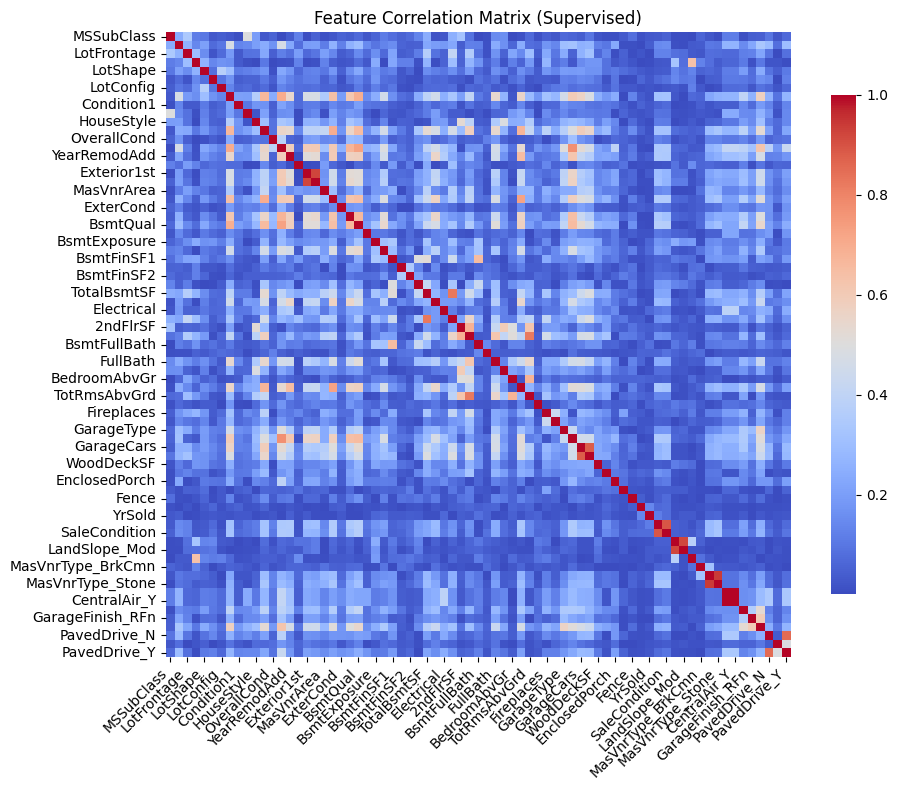

Highly correlated feature pairs (>0.8): [('Exterior1st', 'Exterior2nd'), ('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GarageCars', 'GarageArea'), ('SaleType', 'SaleCondition'), ('LandSlope_Gtl', 'LandSlope_Mod'), ('MasVnrType_BrkFace', 'MasVnrType_Stone'), ('CentralAir_N', 'CentralAir_Y'), ('PavedDrive_N', 'PavedDrive_Y')]
Between 'Exterior1st' and 'Exterior2nd', dropping 'Exterior2nd' (lower target corr)
Between 'TotalBsmtSF' and '1stFlrSF', dropping '1stFlrSF' (lower target corr)
Between 'GrLivArea' and 'TotRmsAbvGrd', dropping 'TotRmsAbvGrd' (lower target corr)
Between 'GarageCars' and 'GarageArea', dropping 'GarageArea' (lower target corr)
Between 'SaleType' and 'SaleCondition', dropping 'SaleCondition' (lower target corr)
Between 'LandSlope_Gtl' and 'LandSlope_Mod', dropping 'LandSlope_Mod' (lower target corr)
Between 'MasVnrType_BrkFace' and 'MasVnrType_Stone', dropping 'MasVnrType_BrkFace' (lower target corr)
Between 'CentralAir_N' and 'CentralAir_Y', dropping '

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from category_encoders.woe import WOEEncoder


X_train_processed, X_test_processed, pipeline = process_with_pipeline(X_train, X_test, y_train, threshold=0.8)


In [30]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1168 non-null   int64  
 1   MSZoning           1168 non-null   float64
 2   LotFrontage        1168 non-null   float64
 3   LotArea            1168 non-null   int64  
 4   LotShape           1168 non-null   float64
 5   LandContour        1168 non-null   float64
 6   LotConfig          1168 non-null   float64
 7   Neighborhood       1168 non-null   float64
 8   Condition1         1168 non-null   float64
 9   BldgType           1168 non-null   float64
 10  HouseStyle         1168 non-null   float64
 11  OverallQual        1168 non-null   int64  
 12  OverallCond        1168 non-null   int64  
 13  YearBuilt          1168 non-null   int64  
 14  YearRemodAdd       1168 non-null   int64  
 15  RoofStyle          1168 non-null   float64
 16  Exterior1st        1168 non

In [28]:
X_train_processed.shape

(1168, 64)

In [29]:
import joblib

# Save pipeline locally in the working directory
pipeline_name = "preprocessing_pipeline_final.pkl"
joblib.dump(pipeline, pipeline_name)

['preprocessing_pipeline_final.pkl']

In [58]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1168 non-null   int64  
 1   MSZoning           1168 non-null   float64
 2   LotFrontage        1168 non-null   float64
 3   LotArea            1168 non-null   int64  
 4   LotShape           1168 non-null   float64
 5   LandContour        1168 non-null   float64
 6   LotConfig          1168 non-null   float64
 7   Neighborhood       1168 non-null   float64
 8   Condition1         1168 non-null   float64
 9   BldgType           1168 non-null   float64
 10  HouseStyle         1168 non-null   float64
 11  OverallQual        1168 non-null   int64  
 12  OverallCond        1168 non-null   int64  
 13  YearBuilt          1168 non-null   int64  
 14  YearRemodAdd       1168 non-null   int64  
 15  RoofStyle          1168 non-null   float64
 16  Exterior1st        1168 non

In [ ]:
# For tree models

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from category_encoders.woe import WOEEncoder
from sklearn.preprocessing import OrdinalEncoder



X_train_processed, X_test_processed, tree_pipeline = process_with_tree_pipeline(X_train, X_test, y_train)


# linear models

## Linear Regression

2025/04/11 08:49:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePricesLinearModel' already exists. Creating a new version of this model...
2025/04/11 08:49:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePricesLinearModel, version 11
Created version '11' of model 'HousePricesLinearModel'.


🏃 View run Linear_Regression_v2 at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1/runs/96a1f71854504c659d5483754d456da1
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1


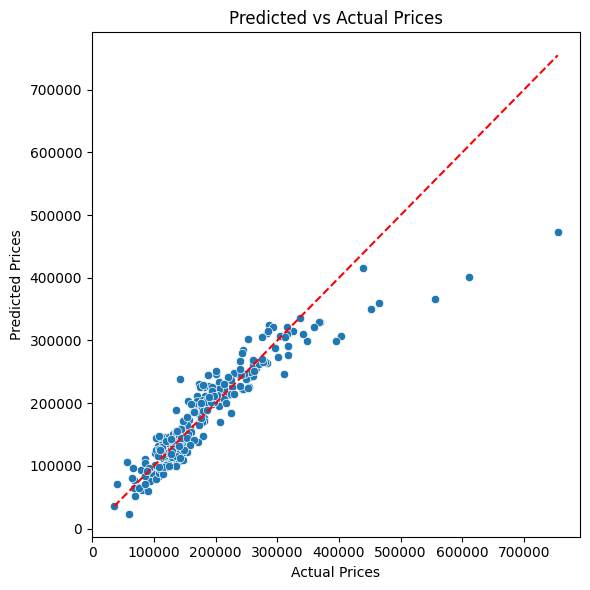

In [33]:
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import seaborn as sns
import matplotlib.pyplot as plt

# Set MLflow experiment
experiment_name = "House Price Regression"
mlflow.set_experiment(experiment_name)

# Initialize model
model = LinearRegression()

# Start MLflow run
with mlflow.start_run() as run:
    # Set a custom name for the run
    mlflow.set_tag("mlflow.runName", "Linear_Regression_v2")

    # Log model parameters (none for basic LinearRegression, but for demo let's log default ones)
    mlflow.log_param("fit_intercept", model.fit_intercept)
    mlflow.log_param("model_type", "LinearRegression")

    # Train the model
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    y_pred_clipped = np.maximum(y_pred, 1)
    y_test_clipped = np.maximum(y_test, 1)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_clipped))

    # Log metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("RMSLE", rmsle)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model", registered_model_name="HousePricesLinearModel")

    # Plot and save prediction vs actual plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Predicted vs Actual Prices")
    plt.tight_layout()
    plt.savefig("scatter_plot.png")

    # Log the plot image
    mlflow.log_artifact("scatter_plot.png")
    mlflow.end_run()

### Linear model + K fold, but got bad results

In [34]:
import numpy as np
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Set MLflow experiment
experiment_name = "House Price Regression"
mlflow.set_experiment(experiment_name)

# Number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(X_train_processed):
    with mlflow.start_run(run_name=f"LinearRegression_Fold_{fold}"):
        # Split the data
        X_train, X_test = X_train_processed.iloc[train_index], X_train_processed.iloc[test_index]  # .iloc for DataFrame
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # .iloc for Series/DataFrame

        # Initialize model
        model = LinearRegression()

        # Log parameters
        mlflow.log_param("fit_intercept", model.fit_intercept)
        mlflow.log_param("model_type", "LinearRegression")
        mlflow.log_param("fold", fold)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Clip negative predictions for RMSLE
        y_pred_clipped = np.maximum(y_pred, 1)
        y_test_clipped = np.maximum(y_test, 1)

        # Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        rmsle = rmsle(y_test_clipped, y_pred_clipped)

        # Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)
        mlflow.log_metric("RMSLE", rmsle)

        # Log model
        mlflow.sklearn.log_model(model, artifact_path=f"model_fold_{fold}")

        # Plot predictions
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title(f"Predicted vs Actual Prices (Fold {fold})")
        plt.tight_layout()

        plot_name = f"scatter_plot_fold_{fold}.png"
        plt.savefig(plot_name)
        mlflow.log_artifact(plot_name)

        fold += 1


🏃 View run LinearRegression_Fold_1 at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1/runs/5816bd5d66b14a9dbfc15d0a67ca3981
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1


TypeError: 'numpy.float64' object is not callable

## Linear Regression with GridSearch and RFE

In [35]:
X_train_processed.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,LandSlope_Gtl,LandSlope_Sev,MasVnrType_BrkCmn,MasVnrType_Stone,CentralAir_N,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y
254,20,0.267011,70.0,8400,-0.408872,-0.001171,-0.065095,-1.249081,0.072739,0.107584,-0.190414,5,6,1957,1957,-0.072929,-1.128428,0.0,-0.938531,-0.500484,-0.871121,-1.317697,0.009919,-0.312052,-0.983336,922,0.029752,0,392,1314,-1.203364,0.146172,0,1314,1,0,1,0,3,-1.121294,0.070561,0,-0.328061,0.457187,1957.0,1,250,0,0,0,0.051406,6,2010,-0.093666,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1066,60,0.267011,59.0,7837,0.618880,-0.001171,-0.065095,2.510871,0.072739,0.107584,0.956348,6,7,1993,1994,-0.072929,1.011247,0.0,1.910097,0.103088,1.302237,1.154735,0.009919,-0.312052,-0.097555,0,0.029752,0,799,799,-0.345039,0.146172,772,1571,0,0,2,1,3,-1.121294,0.070561,1,1.210846,0.457187,1993.0,2,0,40,0,0,0.051406,5,2009,-0.093666,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
638,30,0.267011,67.0,8777,-0.408872,-0.001171,-0.065095,-1.772610,-1.028477,0.107584,-0.190414,5,7,1910,1950,-0.072929,-1.128428,0.0,-0.938531,0.103088,-0.871121,-1.916368,0.009919,-0.312052,-0.097555,0,0.029752,0,796,796,-0.345039,-1.936736,0,796,0,0,1,0,2,-1.121294,0.070561,0,-0.328061,0.457187,1980.0,0,328,0,164,0,0.051406,5,2008,-0.093666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
799,50,0.267011,60.0,7200,-0.408872,-0.001171,-0.069627,-0.833505,-1.028477,0.107584,-1.372918,5,7,1937,1950,-0.072929,-0.992960,252.0,-0.938531,0.103088,-1.425209,1.154735,0.009919,-0.312052,-0.553370,569,0.029752,0,162,731,0.885654,0.146172,787,1768,1,0,1,1,3,1.244576,0.070561,2,1.210846,-1.728832,1939.0,1,0,0,264,0,0.051406,6,2007,-0.093666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
380,50,0.267011,50.0,5000,-0.408872,-0.001171,-0.065095,-0.833505,0.072739,0.107584,-1.372918,5,6,1924,1950,-0.072929,0.280856,0.0,-0.938531,0.103088,-1.425209,-1.317697,0.009919,-0.312052,-0.795283,218,0.029752,0,808,1026,-1.203364,0.146172,665,1691,0,0,2,0,3,1.244576,0.070561,1,-0.328061,-1.728832,1924.0,1,0,0,242,0,0.051406,5,2010,-0.093666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd

experiment_name = "House Price Regression"
run_name = "Linear_Regression_RFE_v1"
mlflow.set_experiment(experiment_name)

base_model = LinearRegression()

pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', RFE(estimator=base_model)),
    ('regressor', base_model)
])

param_grid = {
    'feature_selector__n_features_to_select': [20, 25, 40, 60],
}


grid_search = GridSearchCV(pipeline_new, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# MLflow tracking
with mlflow.start_run(run_name=run_name) as run:
    # Fit the model
    grid_search.fit(X_train_processed, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Get predictions
    y_pred = best_model.predict(X_test_processed)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    y_test_clipped = np.maximum(0, y_test)
    y_pred_clipped = np.maximum(0, y_pred)
    log_rmse = np.sqrt(mean_squared_error(np.log1p(y_test_clipped), np.log1p(y_pred_clipped)))

    
    # Log model type
    mlflow.log_param("model_type", "LinearRegression")
    
    # Log best parameters from GridSearch
    for param_name, param_value in best_params.items():
        mlflow.log_param(param_name, param_value)
    
    # NEW: Log the selected features
    feature_selector = best_model.named_steps['feature_selector']
    selected_features_mask = feature_selector.support_
    feature_names = X_train_processed.columns.tolist()
    selected_features = [feature for feature, selected in zip(feature_names, selected_features_mask) if selected]
    
    # Log selected features as a parameter (as string)
    mlflow.log_param("selected_features", str(selected_features))
    
    # Save and log the selected features as a CSV
    selected_features_df = pd.DataFrame({
        'feature_name': feature_names,
        'selected': selected_features_mask
    })
    selected_features_path = "selected_features.csv"
    selected_features_df.to_csv(selected_features_path, index=False)
    mlflow.log_artifact(selected_features_path)
    
    # Log metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("Log_RMSE", log_rmse)

    
    # NEW: Log optimized RMSE (with validation scores)
    cv_rmse_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])
    best_cv_rmse = cv_rmse_scores[grid_search.best_index_]
    mlflow.log_metric("best_cv_rmse", best_cv_rmse)
    mlflow.log_metric("rmse_std", np.std(cv_rmse_scores))
    
    # Log the final model
    mlflow.sklearn.log_model(best_model, "model", registered_model_name="HousePricesLinearModel_RFE")

    from sklearn.inspection import permutation_importance
    
    result = permutation_importance(best_model, X_test_processed, y_test, n_repeats=10, random_state=42)
    
    perm_sorted_idx = result.importances_mean.argsort()[::-1]
    features = np.array(X_train_processed.columns)[perm_sorted_idx]
    importances = result.importances_mean[perm_sorted_idx]
    
    # Plot and log
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.xlabel("Permutation Importance")
    plt.title("Permutation Feature Importance")
    plt.tight_layout()
    plt.savefig("permutation_importance.png")
    mlflow.log_artifact("permutation_importance.png")


    import shap

    explainer = shap.Explainer(best_model.named_steps['regressor'], X_train_processed[selected_features])
    shap_values = explainer(X_test_processed[selected_features])
    
    # Summary plot
    shap.summary_plot(shap_values, X_test_processed[selected_features], show=False)
    plt.tight_layout()
    plt.savefig("shap_summary.png")
    mlflow.log_artifact("shap_summary.png")

    
    
    # Log feature importances if available
    try:
        if hasattr(best_model.named_steps['regressor'], 'coef_'):
            # For linear models, we can get coefficients
            coef = best_model.named_steps['regressor'].coef_
            # Only get coefficients for selected features
            selected_feature_coefs = [(feature, coef) for feature, selected, coef in 
                                     zip(feature_names, selected_features_mask, coef) if selected]
            
            # Create and log feature importance plot
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 6))
            features, importance = zip(*selected_feature_coefs)
            plt.barh(features, importance)
            plt.xlabel('Coefficient Value')
            plt.title('Feature Importance')
            plt.tight_layout()
            plt.savefig('feature_importance.png')
            mlflow.log_artifact('feature_importance.png')
    except Exception as e:
        # Log any errors that occur when extracting feature importance
        mlflow.log_param("feature_importance_error", str(e))

🏃 View run Linear_Regression_RFE_v1 at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1/runs/0ef1ba1cd2b2475fab92b887c8ef6fac
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1


ValueError: Found input variables with inconsistent numbers of samples: [1168, 934]

## Ridge Regression

In [37]:
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Set up MLflow experiment
experiment_name = "House Price Regression"
run_name = "Ridge_RFE_v3"
experiment_description = "Grid search for Ridge regression with RFE using different alpha values, optimizing for RMSE log"

# Check if experiment exists, otherwise create it
try:
    experiment_id = mlflow.create_experiment(
        experiment_name, 
        tags={"description": experiment_description}
    )
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

# Set the active experiment
mlflow.set_experiment(experiment_name)

# Define a custom scorer that calculates RMSE on log-transformed values
def rmse_log_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    # Handle potential negative predictions
    y_pred = np.maximum(y_pred, 1e-10)  # Set a small positive minimum value
    log_y = np.log(y)
    log_y_pred = np.log(y_pred)
    mse_log = mean_squared_error(log_y, log_y_pred)
    rmse_log = np.sqrt(mse_log)
    return -rmse_log  # Negative because GridSearchCV maximizes score

# Define the parameter grid
param_grid = {
    'ridge__alpha': [50.0, 60.0, 80.0, 100.0],
    'rfe__n_features_to_select': [54, 55, 56]  
}

# Create pipeline with RFE and Ridge
ridge = Ridge()
rfe = RFE(estimator=Ridge(), step=1)
pipeline_new = Pipeline([
    ('rfe', rfe),
    ('ridge', ridge)
])

# Create the grid search
grid_search = GridSearchCV(
    pipeline_new,
    param_grid=param_grid,
    scoring=rmse_log_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Assuming X_train_processed and y_train are your training data
# Fit the grid search
print("Starting grid search...")
grid_search.fit(X_train_processed, y_train)
print("Grid search completed!")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive RMSE
print(f"Best parameters: {best_params}")
print(f"Best RMSE log score: {best_score:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_model.predict(X_test_processed)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE log
y_pred = np.maximum(y_pred, 1e-10)  # Ensure positive values
log_y_test = np.log(y_test)
log_y_pred = np.log(y_pred)
mse_log = mean_squared_error(log_y_test, log_y_pred)
rmse_log = np.sqrt(mse_log)

print(f"Test MAE:     {mae:.4f}")
print(f"Test MSE:     {mse:.4f}")
print(f"Test RMSE:    {rmse:.4f}")
print(f"Test R²:      {r2:.4f}")
print(f"Test RMSE_log: {rmse_log:.4f}")

# Log the best model and results to MLflow
with mlflow.start_run(run_name=run_name):
    # Log all parameters
    mlflow.log_param("alpha", best_params['ridge__alpha'])
    mlflow.log_param("n_features_selected", best_params['rfe__n_features_to_select'])
    mlflow.log_param("total_features", X_train_processed.shape[1])
    
    # Log metrics
    mlflow.log_metrics({
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "rmse_log": rmse_log,
        "cv_rmse_log": best_score
    })
    
    # Log all grid search results as artifacts
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.to_csv("grid_search_results.csv", index=False)
    mlflow.log_artifact("grid_search_results.csv")
    
    # Log the best model
    mlflow.sklearn.log_model(best_model, "ridge_rfe_model")
    
    # Log which features were selected
    if hasattr(best_model.named_steps['rfe'], 'support_'):
        selected_features = np.where(best_model.named_steps['rfe'].support_)[0]
        feature_ranking = best_model.named_steps['rfe'].ranking_
        
        # If you have feature names available, use them
        # Assuming feature_names is a list of feature names
        try:
            feature_names = X_train_processed.columns.tolist()
            selected_feature_names = [feature_names[i] for i in selected_features]
            with open("selected_features.txt", "w") as f:
                f.write("Selected features:\n")
                for name in selected_feature_names:
                    f.write(f"- {name}\n")
                
                f.write("\nFeature rankings:\n")
                for i, name in enumerate(feature_names):
                    f.write(f"- {name}: {feature_ranking[i]}\n")
            
            mlflow.log_artifact("selected_features.txt")
        except:
            # If feature names are not available
            np.savetxt("selected_features.txt", selected_features)
            np.savetxt("feature_ranking.txt", feature_ranking)
            mlflow.log_artifact("selected_features.txt")
            mlflow.log_artifact("feature_ranking.txt")
    
    # Log model type and description
    mlflow.set_tags({
        "model_type": "Ridge Regression with RFE",
        "description": "Grid search over alpha values and number of features using RFE",
        "optimization_metric": "RMSE on log-transformed predictions"
    })
    
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")
    print(f"Experiment ID: {experiment_id}")
    print("Model and results successfully logged to MLflow!")

Starting grid search...


ValueError: Found input variables with inconsistent numbers of samples: [1168, 934]

## Lasso Regression (L1 Regularization)

In [39]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd

experiment_name = "House Price Regression"
run_name = "Lasso_Regression_v4"
mlflow.set_experiment(experiment_name)

# Base model - Lasso regression
base_model = Lasso()

# Pipeline
# Modified pipeline with adjusted parameters
pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', RFE(estimator=Lasso(max_iter=10000, tol=0.01))),
    ('regressor', Lasso(max_iter=10000, tol=0.01))  # Increased max_iter and relaxed tolerance
])

# Modified parameter grid with more reasonable alpha values
param_grid = {
    'feature_selector__n_features_to_select': [18, 20, 22],
    'regressor__alpha': [ 1500.0, 2000.0, 2500.0],  # Lower alpha values to try
}

# GridSearchCV
grid_search = GridSearchCV(pipeline_new, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# MLflow tracking
with mlflow.start_run(run_name=run_name) as run:
    # Fit the model
    grid_search.fit(X_train_processed, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Get predictions
    y_pred = best_model.predict(X_test_processed)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    y_test_clipped = np.maximum(0, y_test)
    y_pred_clipped = np.maximum(0, y_pred)
    log_rmse = np.sqrt(mean_squared_error(np.log1p(y_test_clipped), np.log1p(y_pred_clipped)))

    
    # Log model type
    mlflow.log_param("model_type", "LassoRegression")
    
    # Log best parameters from GridSearch
    for param_name, param_value in best_params.items():
        mlflow.log_param(param_name, param_value)
    
    # Log the selected features
    feature_selector = best_model.named_steps['feature_selector']
    selected_features_mask = feature_selector.support_
    feature_names = X_train_processed.columns.tolist()
    selected_features = [feature for feature, selected in zip(feature_names, selected_features_mask) if selected]
    
    # Log selected features as a parameter (as string)
    mlflow.log_param("selected_features", str(selected_features))
    
    # Save and log the selected features as a CSV
    selected_features_df = pd.DataFrame({
        'feature_name': feature_names,
        'selected': selected_features_mask
    })
    selected_features_path = "selected_features.csv"
    selected_features_df.to_csv(selected_features_path, index=False)
    mlflow.log_artifact(selected_features_path)
    
    # Log metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("Log_RMSE", log_rmse)

    # Log optimized RMSE (with validation scores)
    cv_rmse_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])
    best_cv_rmse = cv_rmse_scores[grid_search.best_index_]
    mlflow.log_metric("best_cv_rmse", best_cv_rmse)
    mlflow.log_metric("rmse_std", np.std(cv_rmse_scores))
    
    # Log the final model
    mlflow.sklearn.log_model(best_model, "model", registered_model_name="HousePricesLassoModel_RFE")



2025/04/11 12:28:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePricesLassoModel_RFE' already exists. Creating a new version of this model...
2025/04/11 12:28:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePricesLassoModel_RFE, version 8
Created version '8' of model 'HousePricesLassoModel_RFE'.


🏃 View run Lasso_Regression_v4 at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1/runs/7029fa464d80457a8948ceeb5a505c12
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/1


# Tree Models

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import mlflow
import mlflow.sklearn  # Optional
import numpy as np


In [32]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test, log_mlflow=False):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)

    print(f"{model_name} RMSE: {rmse:.4f}, R2: {r2:.4f}")

    if log_mlflow:
        with mlflow.start_run(run_name=model_name):
            mlflow.log_param("model", model_name)
            mlflow.log_metric("rmse", rmse)
            mlflow.log_metric("r2", r2)
            
            mlflow.sklearn.log_model(model, model_name)

    return model, rmse, r2


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

param_grids = {
    "RandomForest": {
        "n_estimators": [150, 200, 250, 300],
        "max_depth": [15, 20, 25, 30]
    },
    "GradientBoosting": {
        "n_estimators": [150, 200, 250],
        "learning_rate": [0.05, 0.1, 1, 10.0],
        "max_depth": [2, 3, 4]
    },
    "Bagging": {
        "n_estimators": [10, 50],
        "max_samples": [0.5, 1.0]
    },
    "DecisionTree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 10]
    },
    "XGBoost": {
        "n_estimators": [150, 200, 250],
        "learning_rate": [0.05, 0.1, 1],
        "max_depth": [2, 3, 4]
    }
}


In [34]:
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(0, y_pred)))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree  # for visualizing decision trees
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

results_df = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    grid = GridSearchCV(model, param_grids[name], scoring=rmsle_scorer, cv=5, n_jobs=-1)
    grid.fit(X_train_processed, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test_processed)
    rmsle_score = rmsle(y_test, preds)
    residuals = y_test - preds

    # MLflow tracking
    with mlflow.start_run(run_name=name) as run:
        mlflow.log_params(grid.best_params_)
        mlflow.log_metric("RMSLE", rmsle_score)

        # ---- FEATURE IMPORTANCE PLOT ----
        if hasattr(best_model, 'feature_importances_'):
            importances = best_model.feature_importances_
            if hasattr(X_train_processed, 'columns'):
                feature_names = X_train_processed.columns
            else:
                feature_names = [f"Feature_{i}" for i in range(len(importances))]

            feat_imp_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)

            # Save CSV
            feat_imp_csv = f"{name}_feature_importance.csv"
            feat_imp_df.to_csv(feat_imp_csv, index=False)
            mlflow.log_artifact(feat_imp_csv)

            # Plot feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
            plt.title(f"Top 20 Feature Importances - {name}")
            plt.tight_layout()
            fi_plot_path = f"{name}_feature_importance.png"
            plt.savefig(fi_plot_path)
            mlflow.log_artifact(fi_plot_path)
            plt.close()

        # ---- RESIDUAL PLOT ----
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=preds, y=residuals)
        plt.axhline(0, color='r', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title(f"Residual Plot - {name}")
        plt.tight_layout()
        res_plot_path = f"{name}_residuals.png"
        plt.savefig(res_plot_path)
        mlflow.log_artifact(res_plot_path)
        plt.close()

        # ---- DECISION TREE VISUALIZATION ----
        if "DecisionTree" in name or "Tree" in name or hasattr(best_model, "tree_"):
            plt.figure(figsize=(20, 10))
            plot_tree(best_model, 
                      feature_names=feature_names, 
                      filled=True, 
                      max_depth=3,  # to avoid cluttering
                      fontsize=8)
            plt.title(f"Decision Tree - {name} (depth=3)")
            plt.tight_layout()
            tree_plot_path = f"{name}_tree_plot.png"
            plt.savefig(tree_plot_path)
            mlflow.log_artifact(tree_plot_path)
            plt.close()

        # ---- PREDICTIONS CSV ----
        pred_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': preds,
            'Residual': residuals
        })
        pred_csv = f"{name}_predictions.csv"
        pred_df.to_csv(pred_csv, index=False)
        mlflow.log_artifact(pred_csv)

        # ---- MODEL LOGGING ----
        model_name = f"HousePrice_{name}"
        mlflow.sklearn.log_model(best_model, artifact_path="model", registered_model_name=model_name)

        results_df.append({
            'Model': name,
            'BestParams': grid.best_params_,
            'RMSLE': rmsle_score,
            'MLflowRunID': run.info.run_id
        })



Training RandomForest...


2025/04/11 12:13:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePrice_RandomForest' already exists. Creating a new version of this model...
2025/04/11 12:13:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePrice_RandomForest, version 5
Created version '5' of model 'HousePrice_RandomForest'.


🏃 View run RandomForest at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5/runs/ea1ee94a2c1b44178adadb1727d95f46
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5

Training GradientBoosting...


2025/04/11 12:15:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePrice_GradientBoosting' already exists. Creating a new version of this model...
2025/04/11 12:15:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePrice_GradientBoosting, version 4
Created version '4' of model 'HousePrice_GradientBoosting'.


🏃 View run GradientBoosting at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5/runs/8bdf83e57a4c4bffa1d4dc1c6ed44a30
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5

Training Bagging...


2025/04/11 12:15:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePrice_Bagging' already exists. Creating a new version of this model...
2025/04/11 12:15:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePrice_Bagging, version 4
Created version '4' of model 'HousePrice_Bagging'.


🏃 View run Bagging at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5/runs/3801250da44b421c88643147203e1816
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5

Training DecisionTree...


2025/04/11 12:15:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePrice_DecisionTree' already exists. Creating a new version of this model...
2025/04/11 12:15:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePrice_DecisionTree, version 4
Created version '4' of model 'HousePrice_DecisionTree'.


🏃 View run DecisionTree at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5/runs/e179cfc5a3ca4f349d97b7ec50807c0f
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5

Training XGBoost...


2025/04/11 12:16:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'HousePrice_XGBoost' already exists. Creating a new version of this model...
2025/04/11 12:16:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePrice_XGBoost, version 4
Created version '4' of model 'HousePrice_XGBoost'.


🏃 View run XGBoost at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5/runs/742f5a49a7bf4947a9605e99770cbdb3
🧪 View experiment at: https://dagshub.com/ekvirika/HousePrices.mlflow/#/experiments/5
